<a href="https://colab.research.google.com/github/Rana00091/sdaia_clouders/blob/main/ML1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


In [ ]:
cols = ['fLength' ,'fWidth','fSize','fConc','fConc1', 'fAsym' ,'fM3Long','fM3Trans','fAlpha','fDist','class']
df = pd.read_csv("magic04.data" , names = cols)
df.head()

fLength    fWidth   fSize   fConc  fConc1     fAsym  fM3Long  fM3Trans  \
0   28.7967   16.0021  2.6449  0.3918  0.1982   27.7004  22.0110   -8.2027   
1   31.6036   11.7235  2.5185  0.5303  0.3773   26.2722  23.8238   -9.9574   
2  162.0520  136.0310  4.0612  0.0374  0.0187  116.7410 -64.8580  -45.2160   
3   23.8172    9.5728  2.3385  0.6147  0.3922   27.2107  -6.4633   -7.1513   
4   75.1362   30.9205  3.1611  0.3168  0.1832   -5.5277  28.5525   21.8393   

    fAlpha     fDist class  
0  40.0920   81.8828     g  
1   6.3609  205.2610     g  
2  76.9600  256.7880     g  
3  10.4490  116.7370     g  
4   4.6480  356.4620     g

In [ ]:
df['class'].unique()

array(['g', 'h'], dtype=object)

Here as the only unique valuse are H & G , we can turn it into 0 and 1 ..

In [ ]:
df['class'] = (df['class']== 'g').astype(int)

In [ ]:
print(df.columns)

Index(['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long',
       'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')


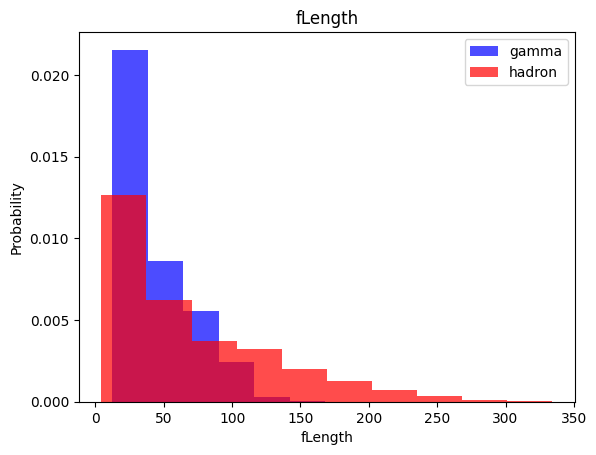

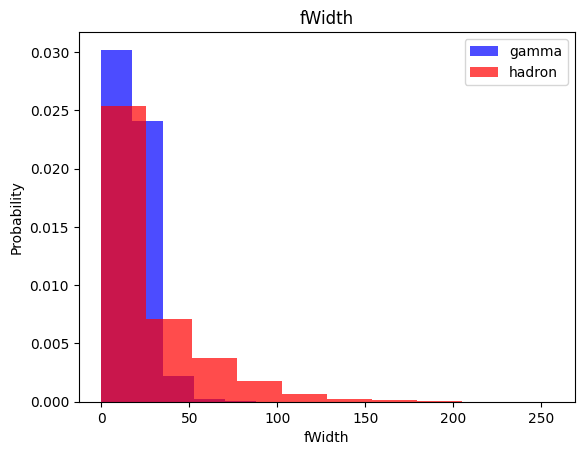

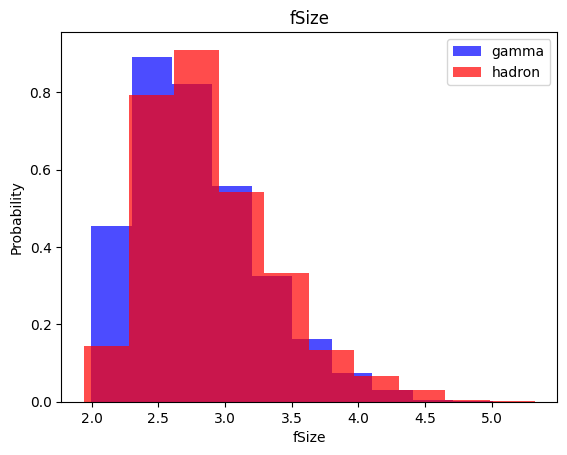

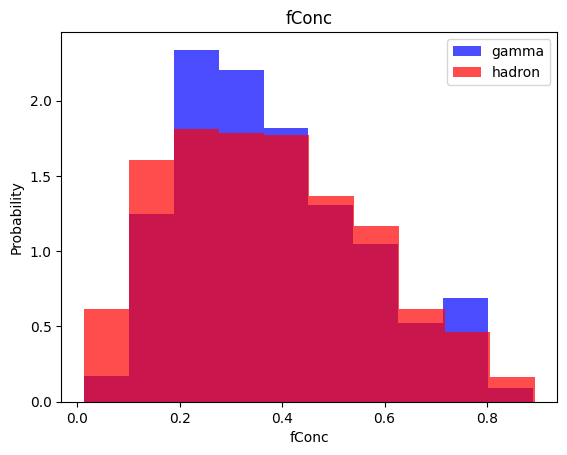

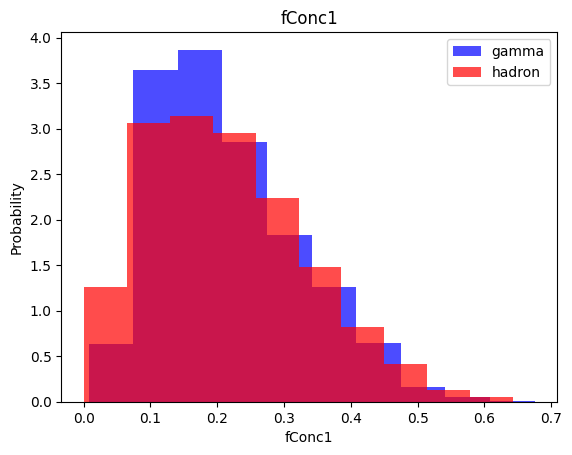

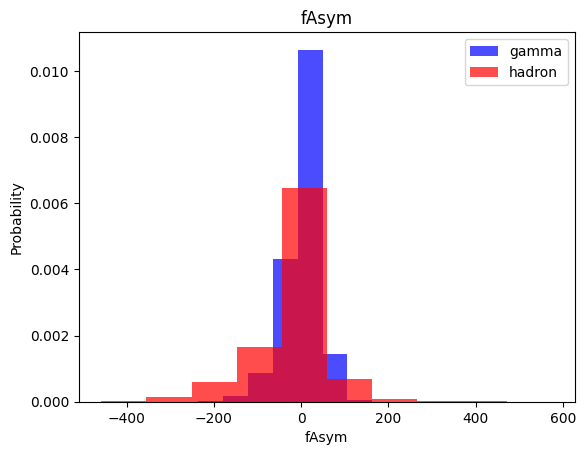

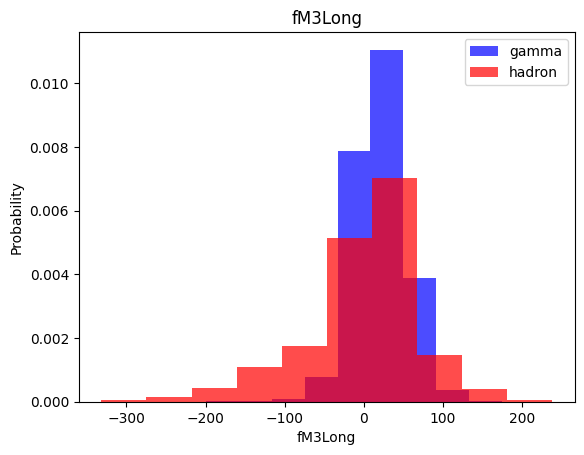

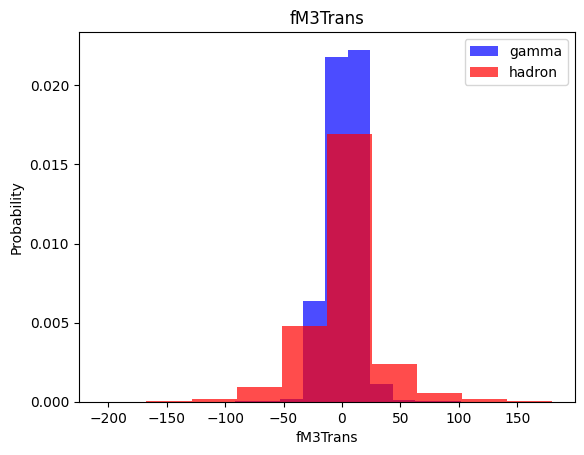

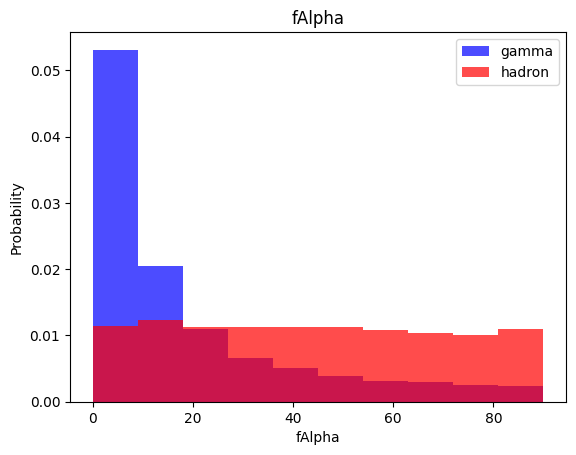

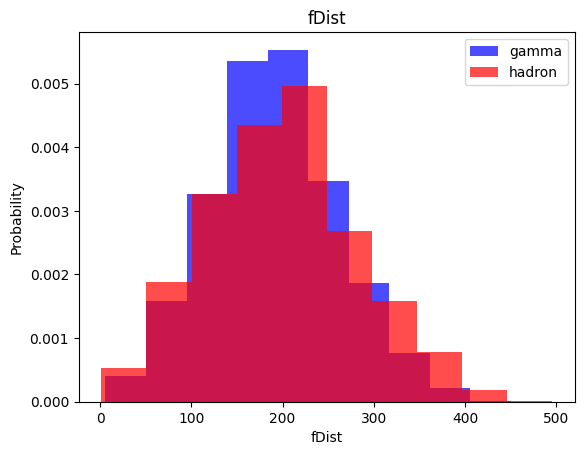

In [ ]:
# here she puts density and alpha as a base to compare between g & h
# also there was a mistake don't forget [:-1] which is a list not the last item [-1]
for label in cols[:-1]:
  plt.hist(df[df['class']== 1][label] , color='blue', label ='gamma', alpha=0.7 , density=True)
  plt.hist(df[df['class']== 0][label] , color='red', label = 'hadron', alpha=0.7 , density=True)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

Train , validation , Test Dataset

In [ ]:
# is is to split data 60% ,, 60 -80 will go to validation , 80~100 will be test .

train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [ ]:
# we have to create a mean , by creating a scale

def scale_dataset(dataframe, oversample=False):
  x = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  #take x an fit it to stander , and transform all values
  x = scaler.fit_transform(x)

  # to match , or scale
  if oversample:
    ros = RandomOverSampler()
    x, y = ros.fit_resample(x, y)

  # 2D numpay
  data = np.hstack((x,np.reshape (y,(-1,1))))

  return data, x, y



In [ ]:
print(len(train[train["class"]==1])) #gamma
print(len(train[train["class"]==0])) #H

# we want to make both valuse almost equal to the result would be true and not defeted by the larger number.

7364
4048


In [ ]:
trian, x_train, y_train = scale_dataset(train, oversample=True)
valid, x_valid, y_valid = scale_dataset(train, oversample=False)
test, x_test, y_test = scale_dataset(train, oversample=False)

In [ ]:
len(y_train)

14728

In [ ]:
sum(y_train == 1)

7364

In [ ]:
sum(y_train == 0)

7364

# K-Nearist Neighnor

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_modle = KNeighborsClassifier(n_neighbors=5)
knn_modle.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_modle.predict(x_test)

In [ ]:
sum(y_test)

7364

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4048
           1       0.92      0.91      0.91      7364

    accuracy                           0.89     11412
   macro avg       0.87      0.88      0.88     11412
weighted avg       0.89      0.89      0.89     11412



# Naive Base

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit(x_train, y_train)

In [ ]:
y_pred = nb_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      4048
           1       0.73      0.89      0.81      7364

    accuracy                           0.72     11412
   macro avg       0.71      0.65      0.66     11412
weighted avg       0.72      0.72      0.70     11412



# Log Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(x_train, y_train)

In [ ]:
y_pred = lg_model.predict(x_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.72      0.70      4048
           1       0.84      0.82      0.83      7364

    accuracy                           0.79     11412
   macro avg       0.77      0.77      0.77     11412
weighted avg       0.79      0.79      0.79     11412



# SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit(x_train, y_train)

In [ ]:
y_pred = svm_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.80      0.81      4048
           1       0.89      0.90      0.90      7364

    accuracy                           0.87     11412
   macro avg       0.86      0.85      0.85     11412
weighted avg       0.87      0.87      0.87     11412



# Neural Net

In [ ]:
import tensorflow as tf

In [ ]:
def plot_history(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10 , 8)) #to split plot
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Binary crossentropy')
  ax1.legend()
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label= 'accuracy')
  ax2.plot(history.history ['val_accuracy'], label= 'val_accuracy')
  ax2.set_xlabel( 'Epoch')
  ax2.set_ylabel( 'Accuracy')
  ax2.legend()
  ax2.grid(True)

  plt.show()



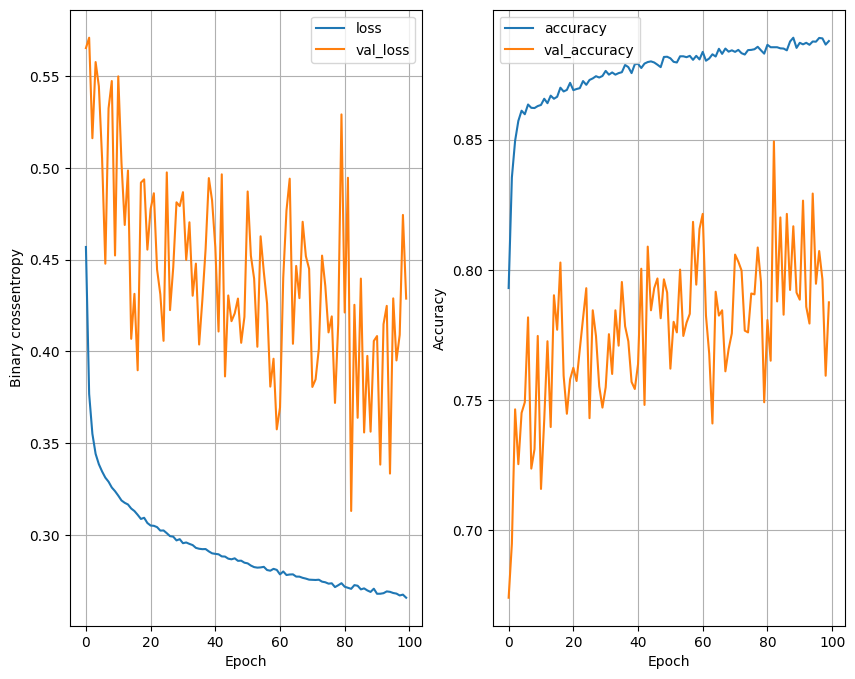

In [ ]:
plot_history(history)

In [ ]:
def train_model(x_train, y_train,num_nodes, dropout_prob, lr,batch_size, epochs):
  nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(10,) ),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(dropout_prob),
    tf.keras.layers.Dense(1, activation='sigmoid')

    ])
  nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss='binary_crossentropy', metrics=['accuracy'])

  history = nn_model.fit(
    x_train ,y_train, epochs=epochs, batch_size= batch_size, validation_split=0.2 ,verbose=0
)
  return nn_model, history

16 nodes, dropout 0, lr 0.1 , batch size 32


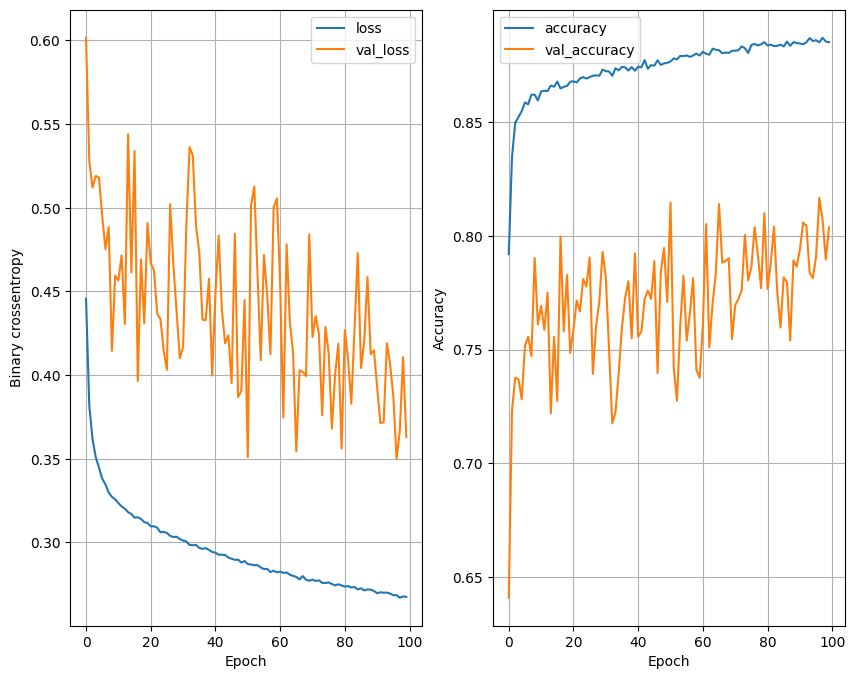

357/357 [==============================] - 0s 985us/step - loss: 0.2606 - accuracy: 0.8921
16 nodes, dropout 0, lr 0.1 , batch size 64


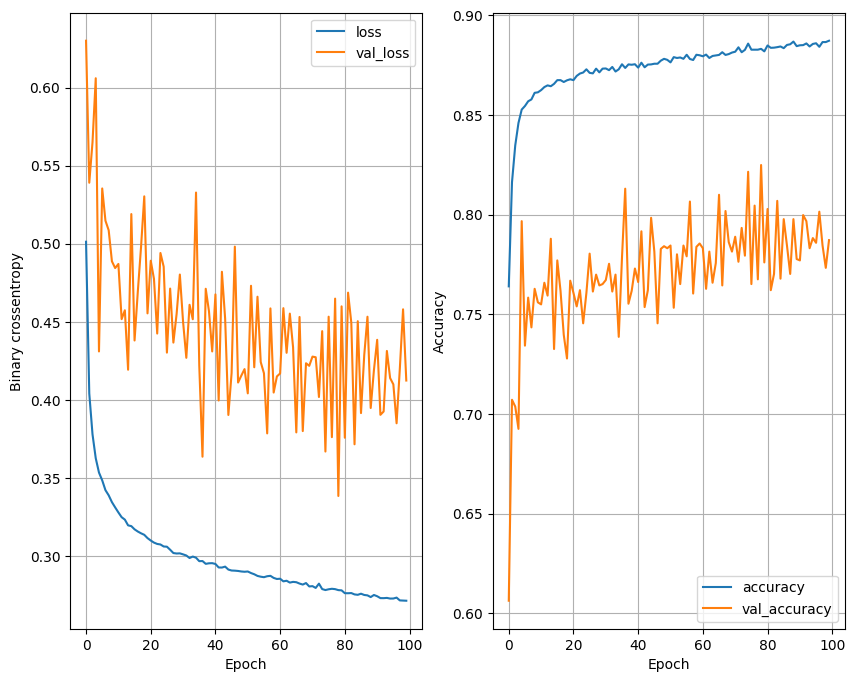

357/357 [==============================] - 0s 1ms/step - loss: 0.2623 - accuracy: 0.8921
16 nodes, dropout 0, lr 0.1 , batch size 128


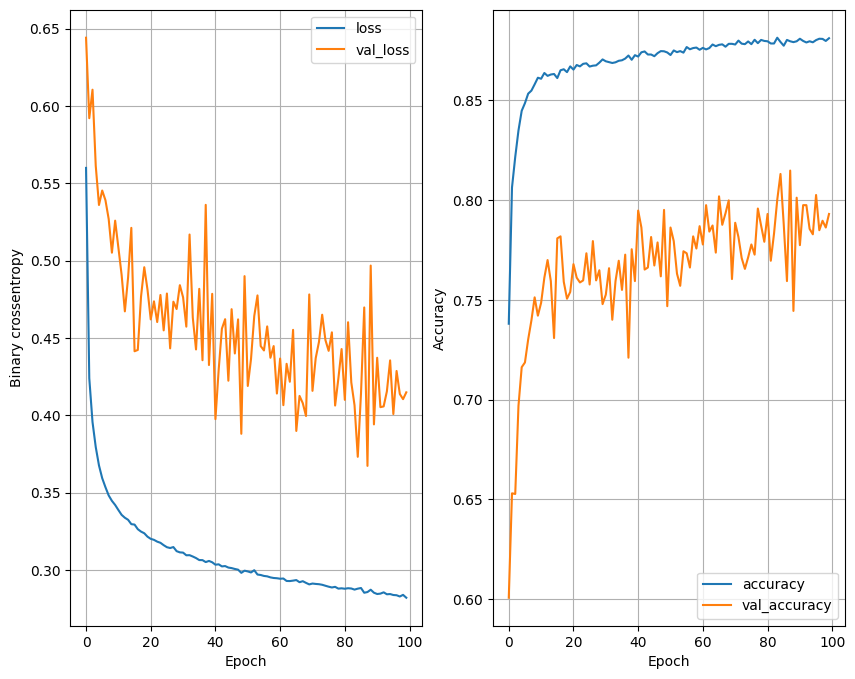

357/357 [==============================] - 0s 1ms/step - loss: 0.2755 - accuracy: 0.8852
16 nodes, dropout 0, lr 0.005 , batch size 32


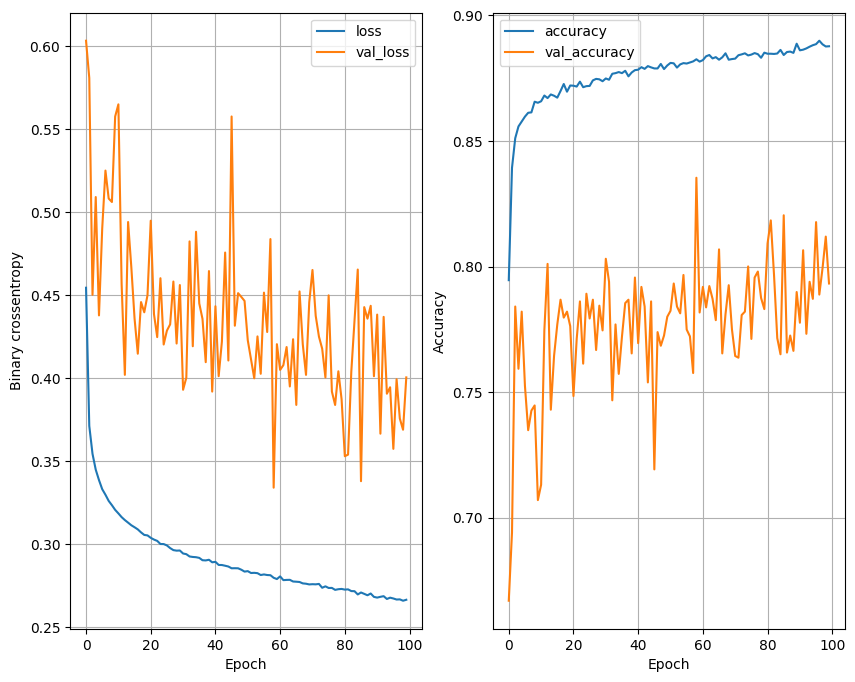

357/357 [==============================] - 0s 1ms/step - loss: 0.2546 - accuracy: 0.8933
16 nodes, dropout 0, lr 0.005 , batch size 64


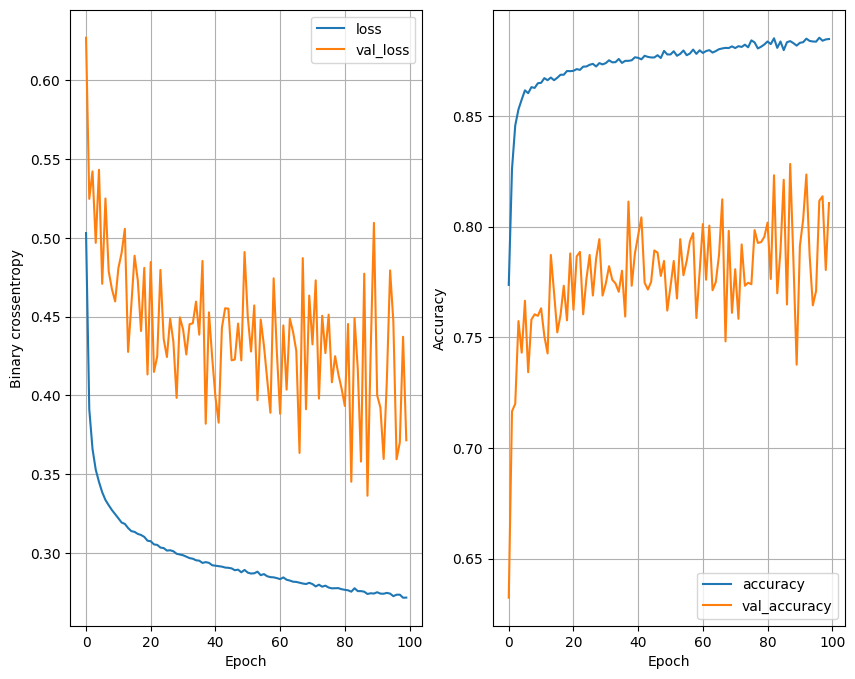

357/357 [==============================] - 0s 1ms/step - loss: 0.2656 - accuracy: 0.8905
16 nodes, dropout 0, lr 0.005 , batch size 128


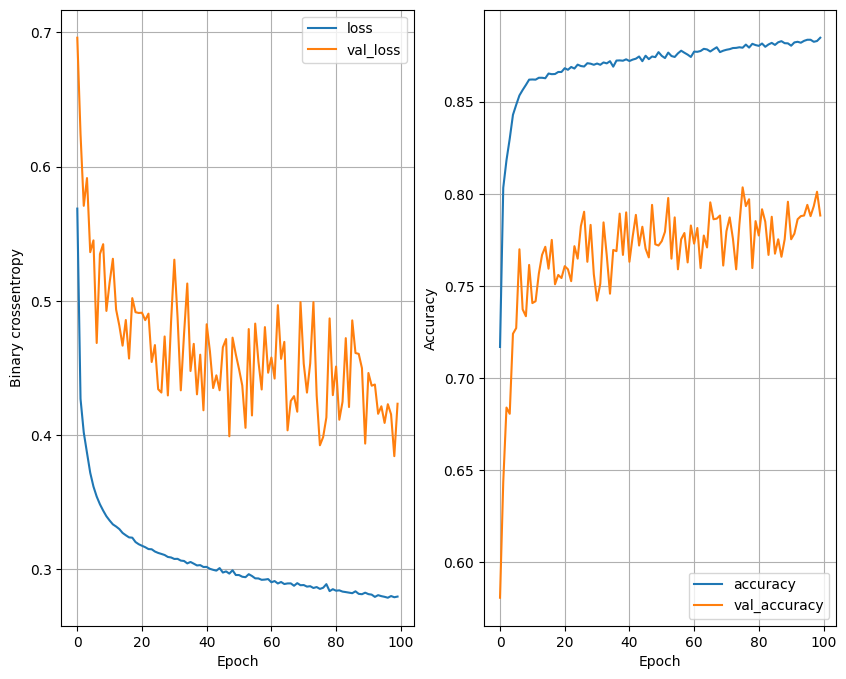

357/357 [==============================] - 0s 980us/step - loss: 0.2698 - accuracy: 0.8889
16 nodes, dropout 0, lr 0.001 , batch size 32


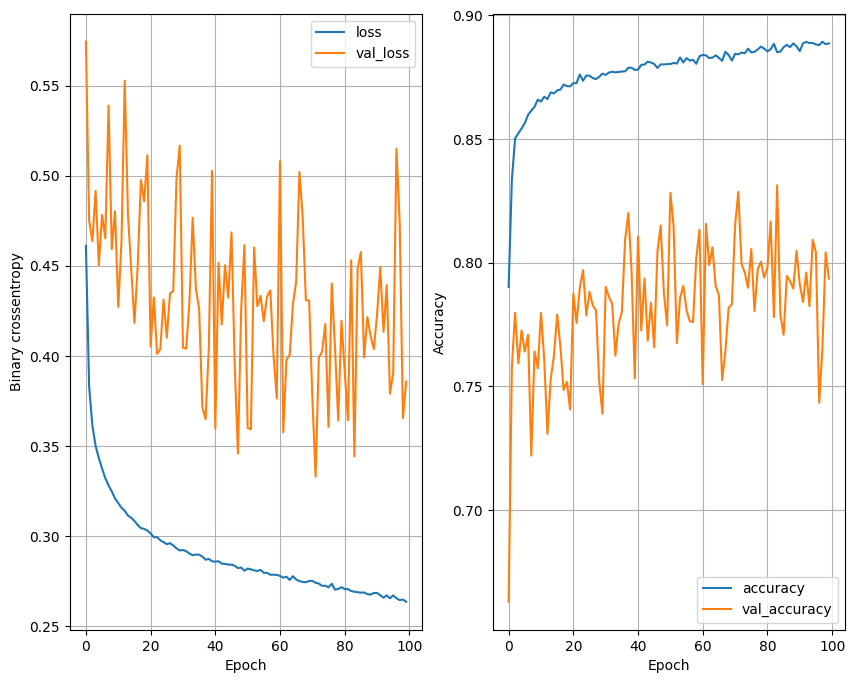

357/357 [==============================] - 0s 1ms/step - loss: 0.2583 - accuracy: 0.8954
16 nodes, dropout 0, lr 0.001 , batch size 64


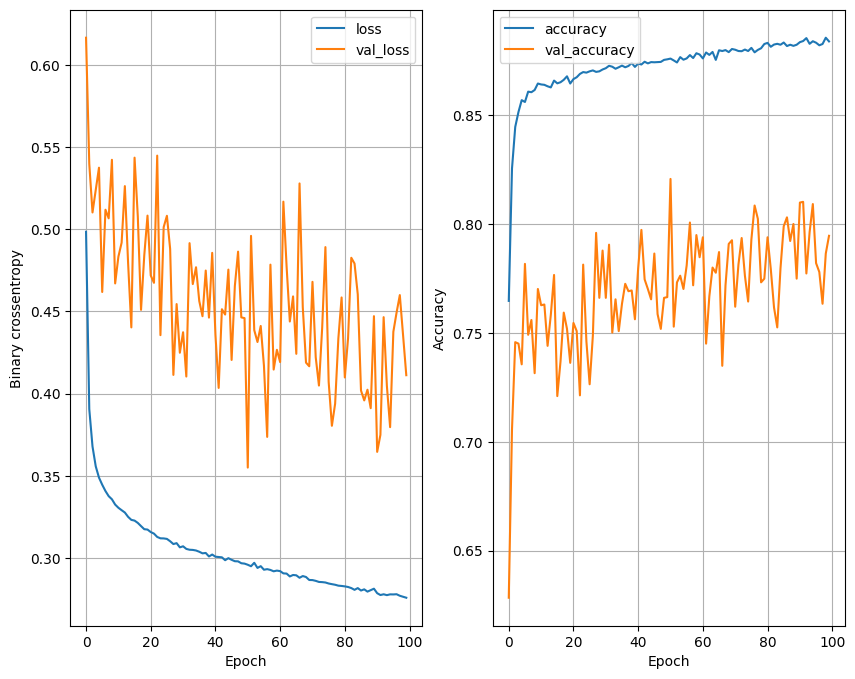

357/357 [==============================] - 1s 1ms/step - loss: 0.2682 - accuracy: 0.8885
16 nodes, dropout 0, lr 0.001 , batch size 128


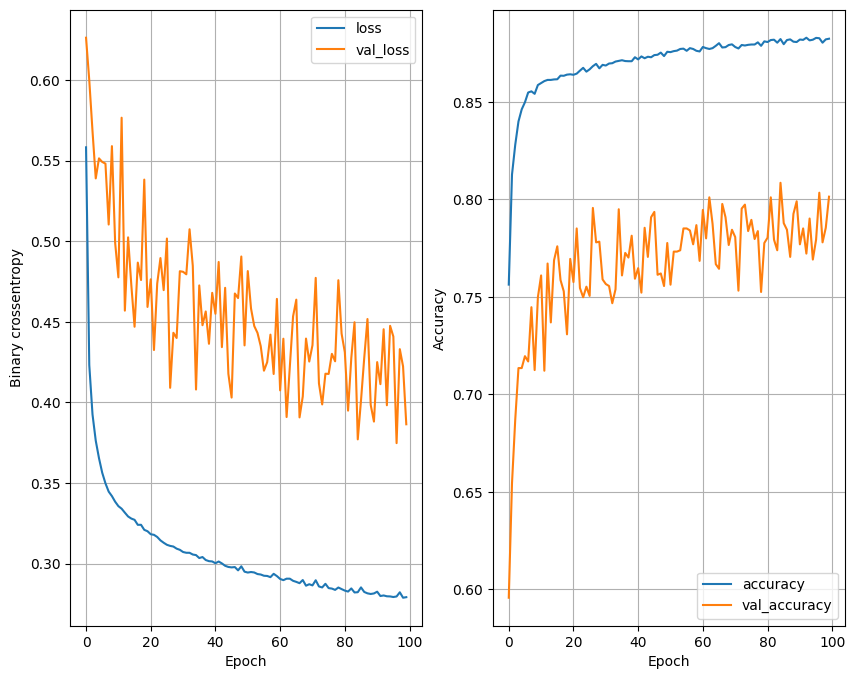

357/357 [==============================] - 1s 2ms/step - loss: 0.2743 - accuracy: 0.8853
16 nodes, dropout 0.2, lr 0.1 , batch size 32


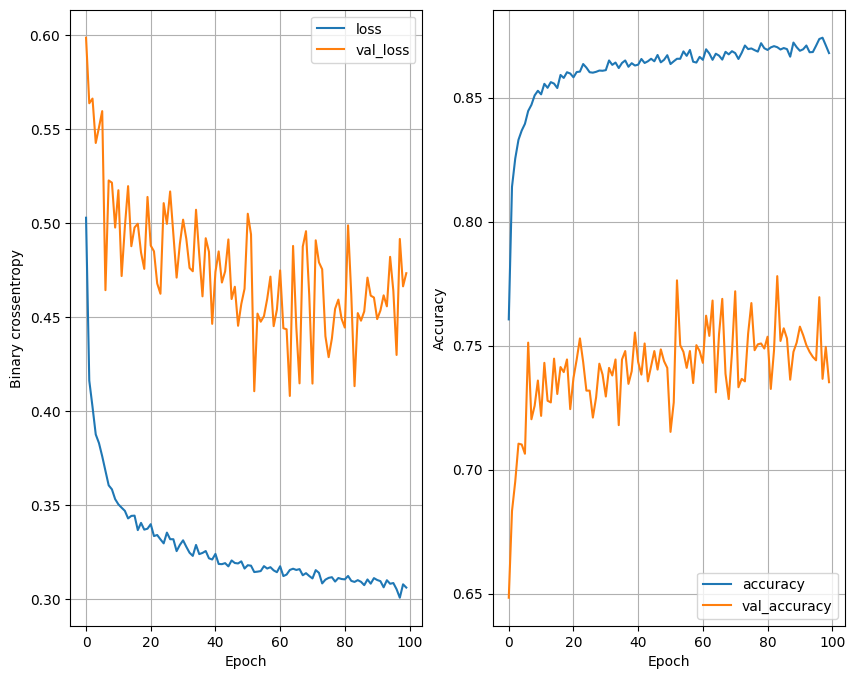

357/357 [==============================] - 0s 1ms/step - loss: 0.2787 - accuracy: 0.8841
16 nodes, dropout 0.2, lr 0.1 , batch size 64


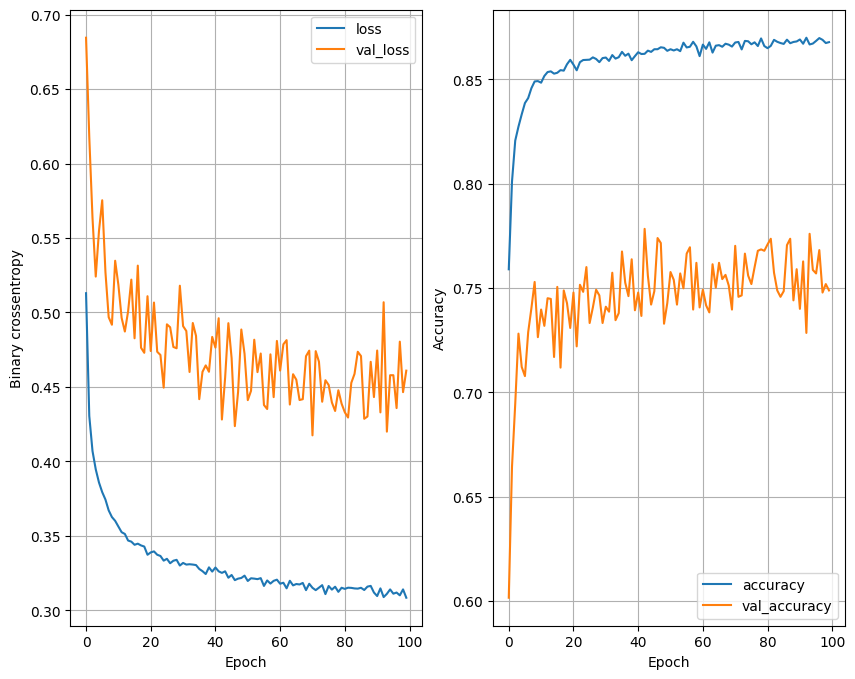

357/357 [==============================] - 0s 1ms/step - loss: 0.2835 - accuracy: 0.8814
16 nodes, dropout 0.2, lr 0.1 , batch size 128


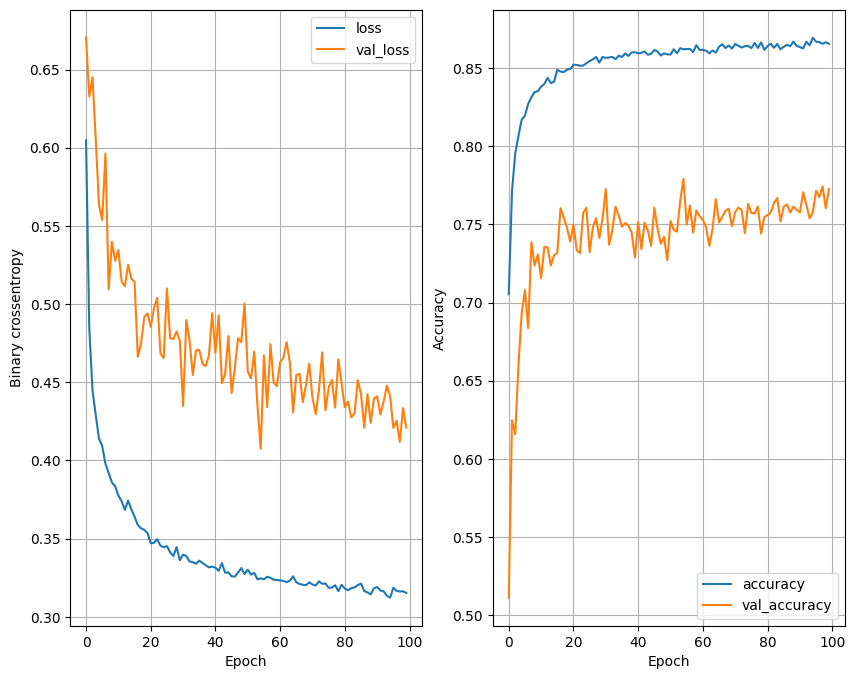

357/357 [==============================] - 0s 1ms/step - loss: 0.2910 - accuracy: 0.8790
16 nodes, dropout 0.2, lr 0.005 , batch size 32


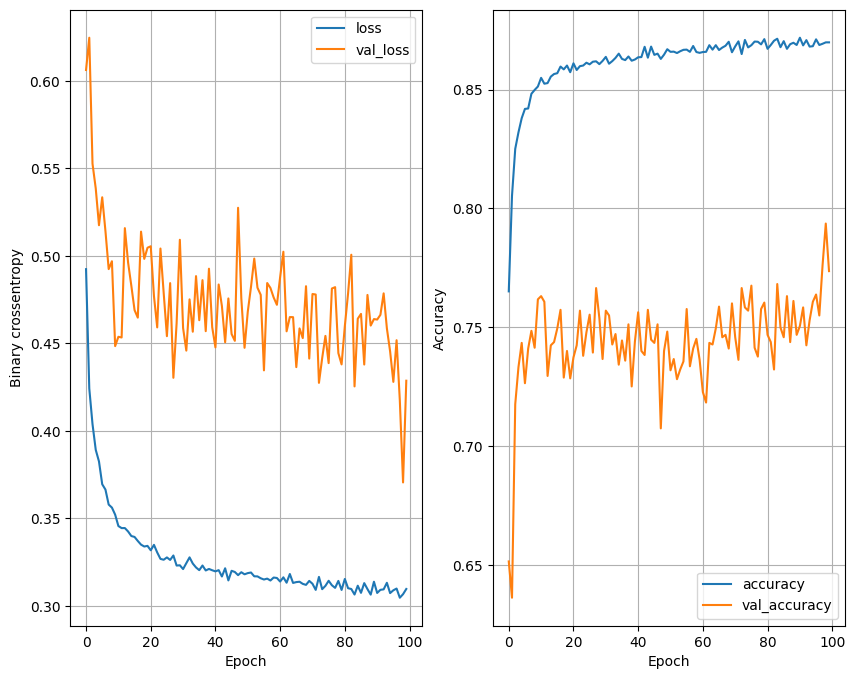

357/357 [==============================] - 0s 1ms/step - loss: 0.2782 - accuracy: 0.8853
16 nodes, dropout 0.2, lr 0.005 , batch size 64


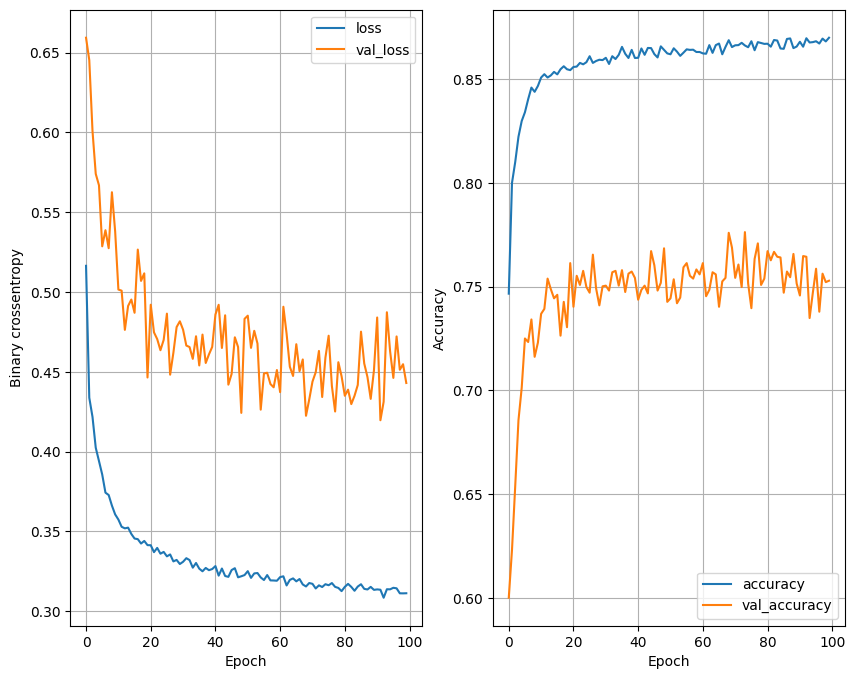

357/357 [==============================] - 0s 1ms/step - loss: 0.2838 - accuracy: 0.8817
16 nodes, dropout 0.2, lr 0.005 , batch size 128


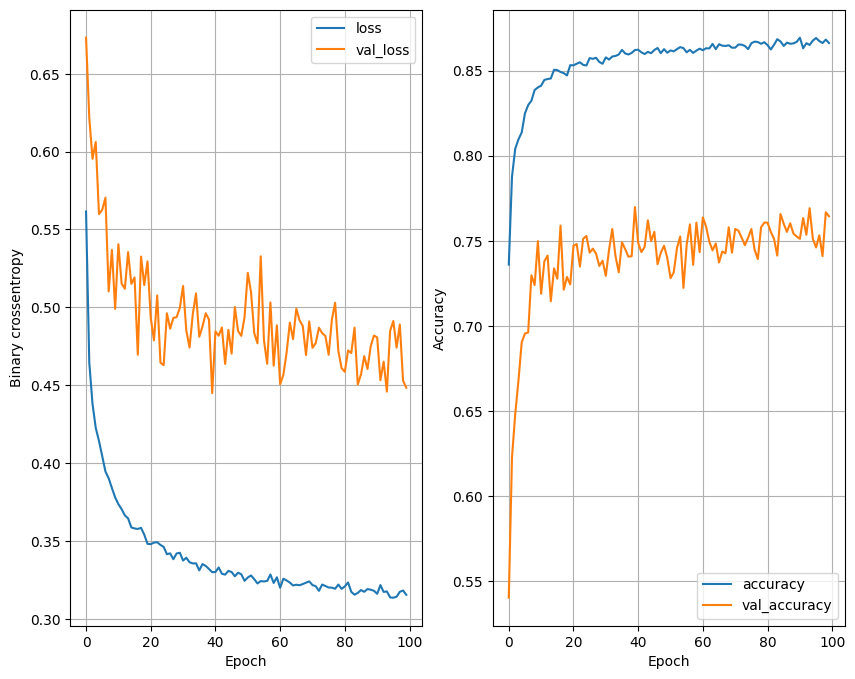

357/357 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.8805
16 nodes, dropout 0.2, lr 0.001 , batch size 32


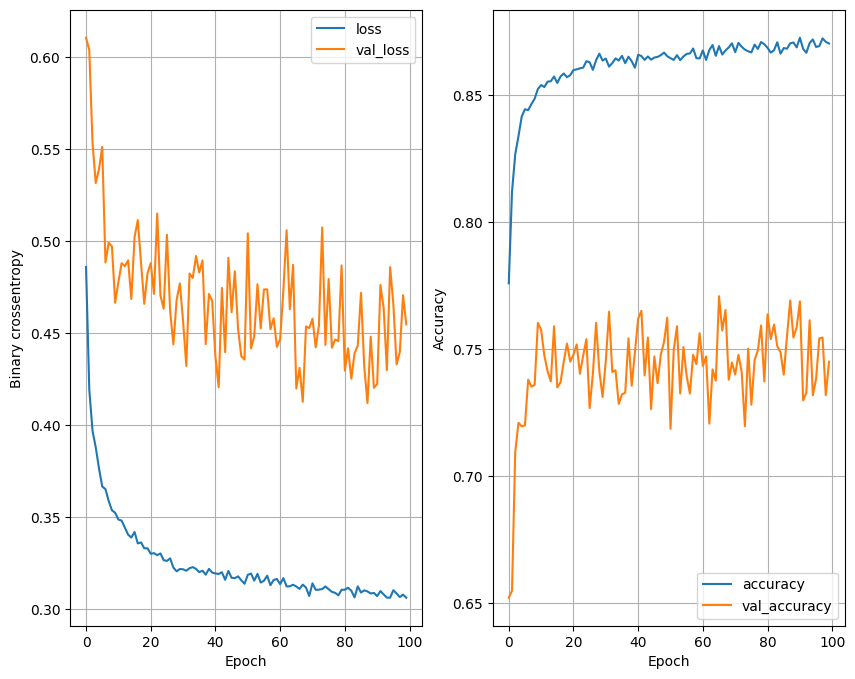

357/357 [==============================] - 0s 1ms/step - loss: 0.2778 - accuracy: 0.8834
16 nodes, dropout 0.2, lr 0.001 , batch size 64


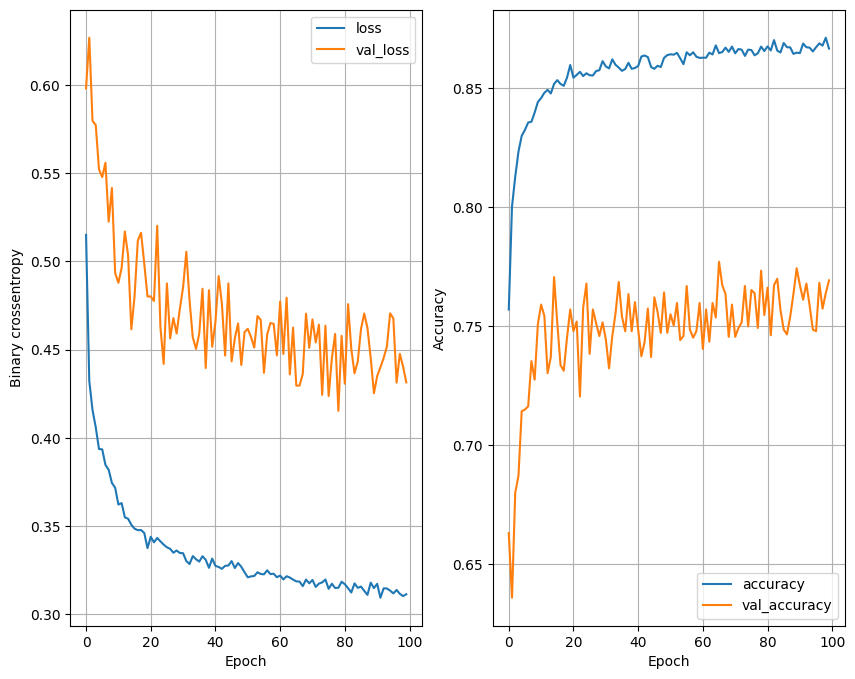

357/357 [==============================] - 1s 2ms/step - loss: 0.2836 - accuracy: 0.8813
16 nodes, dropout 0.2, lr 0.001 , batch size 128


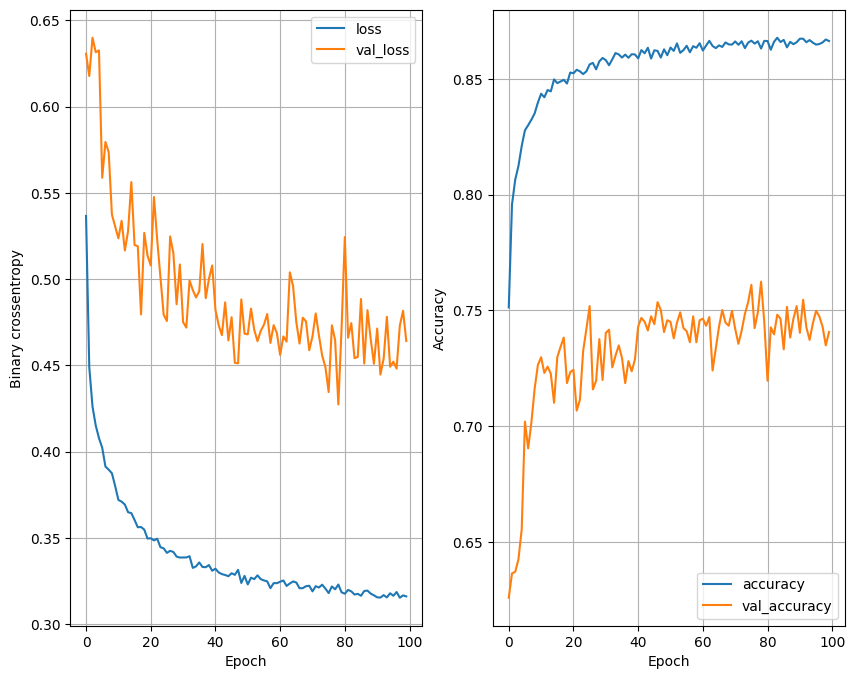

357/357 [==============================] - 0s 1ms/step - loss: 0.2898 - accuracy: 0.8807
32 nodes, dropout 0, lr 0.1 , batch size 32


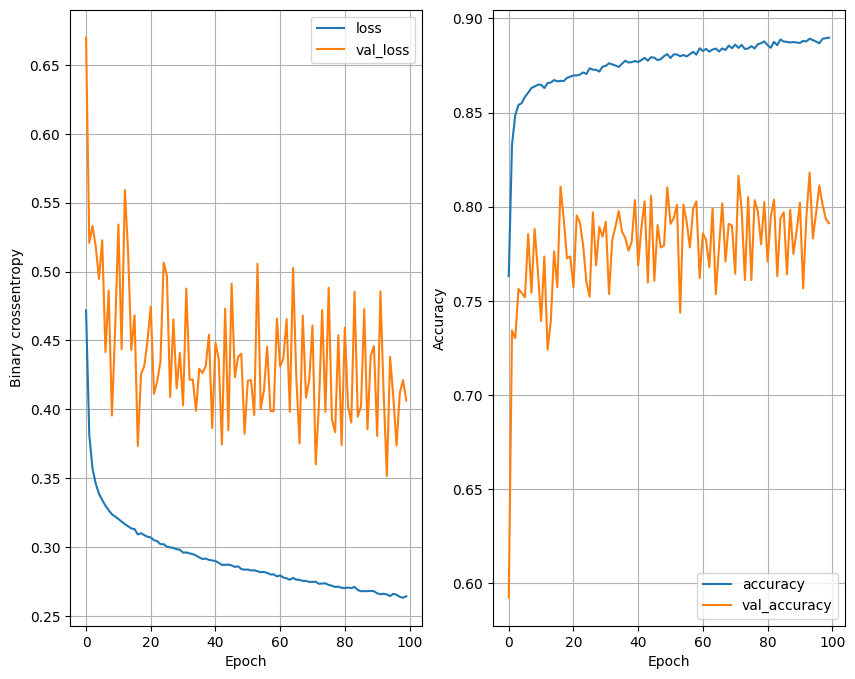

357/357 [==============================] - 0s 1ms/step - loss: 0.2523 - accuracy: 0.8945
32 nodes, dropout 0, lr 0.1 , batch size 64


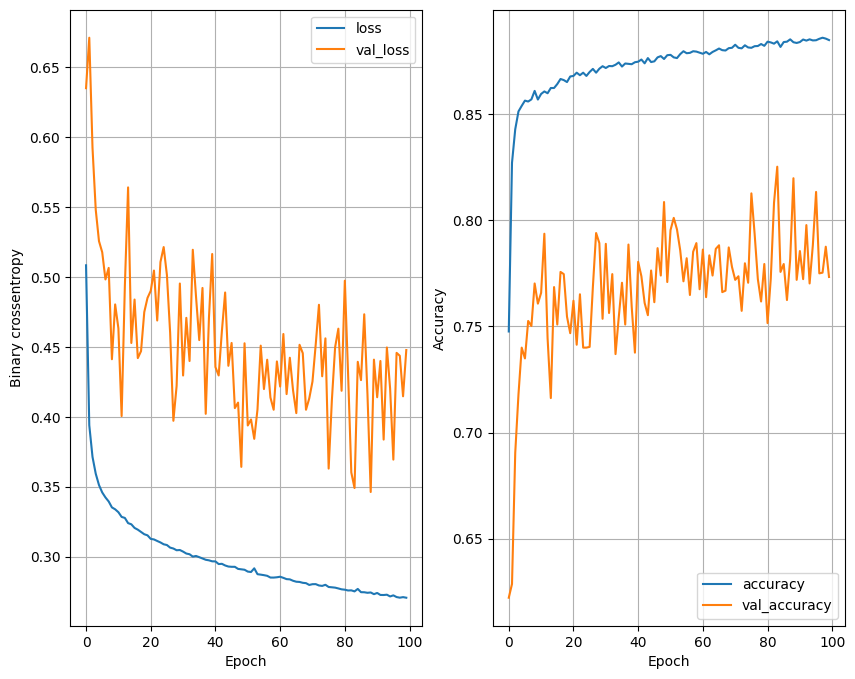

357/357 [==============================] - 0s 1ms/step - loss: 0.2621 - accuracy: 0.8900
32 nodes, dropout 0, lr 0.1 , batch size 128


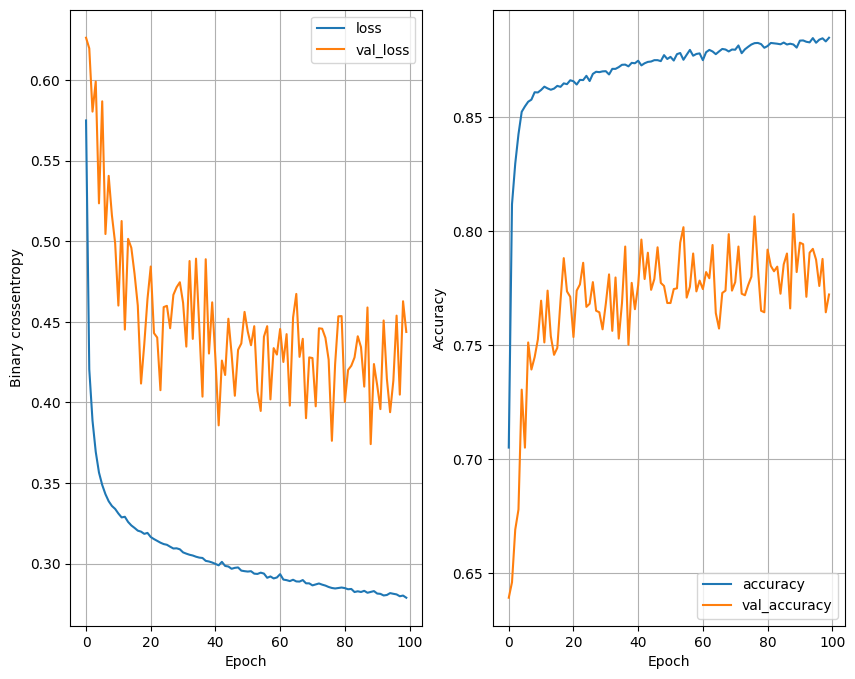

357/357 [==============================] - 0s 1ms/step - loss: 0.2723 - accuracy: 0.8885
32 nodes, dropout 0, lr 0.005 , batch size 32


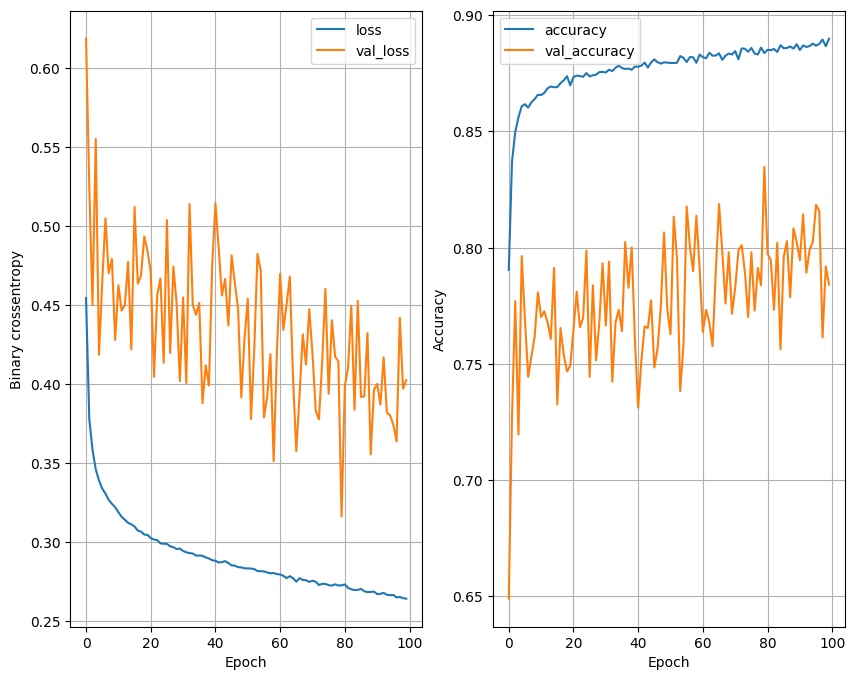

357/357 [==============================] - 1s 1ms/step - loss: 0.2549 - accuracy: 0.8945
32 nodes, dropout 0, lr 0.005 , batch size 64


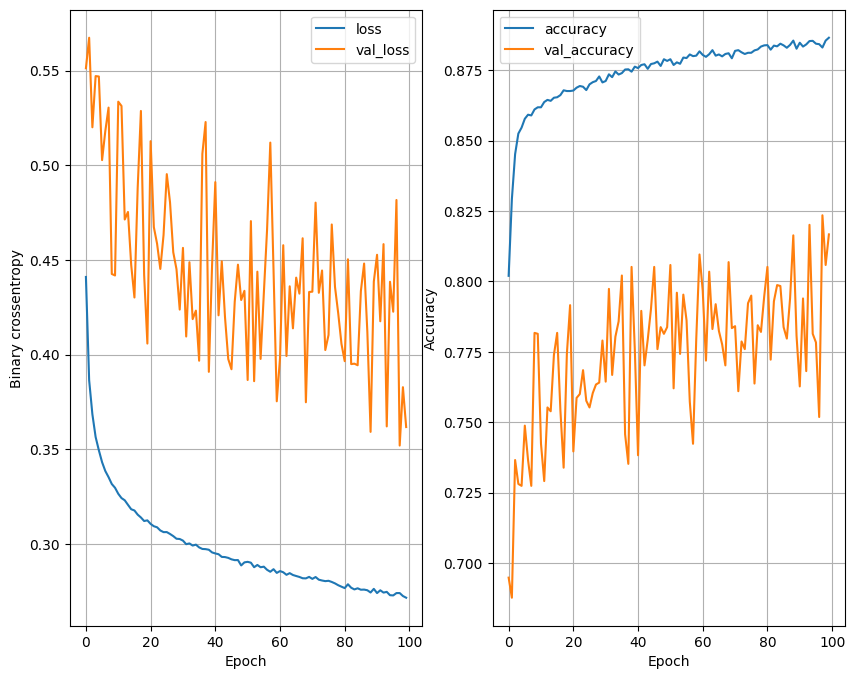

357/357 [==============================] - 0s 1ms/step - loss: 0.2655 - accuracy: 0.8906
32 nodes, dropout 0, lr 0.005 , batch size 128


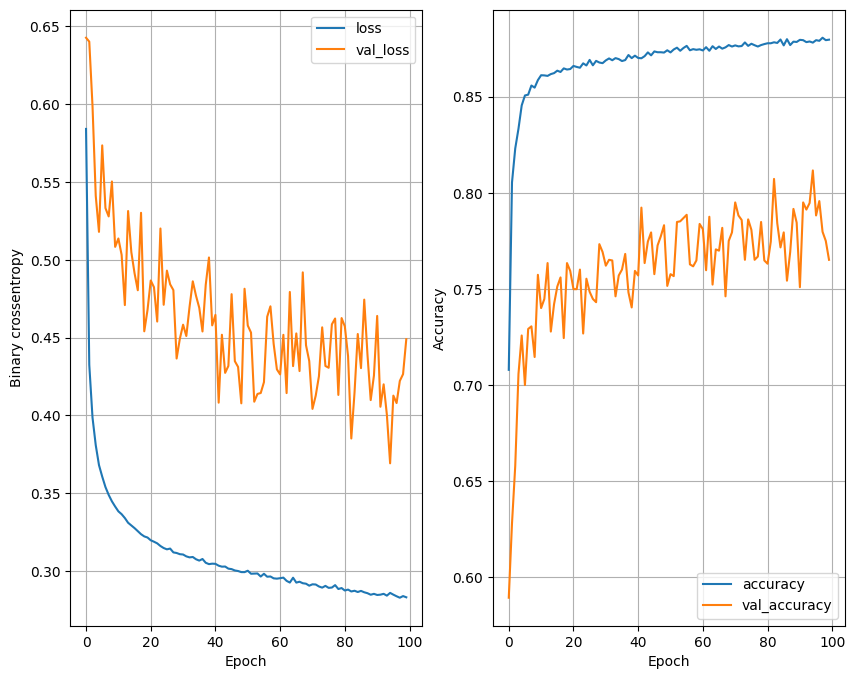

357/357 [==============================] - 0s 1ms/step - loss: 0.2757 - accuracy: 0.8835
32 nodes, dropout 0, lr 0.001 , batch size 32


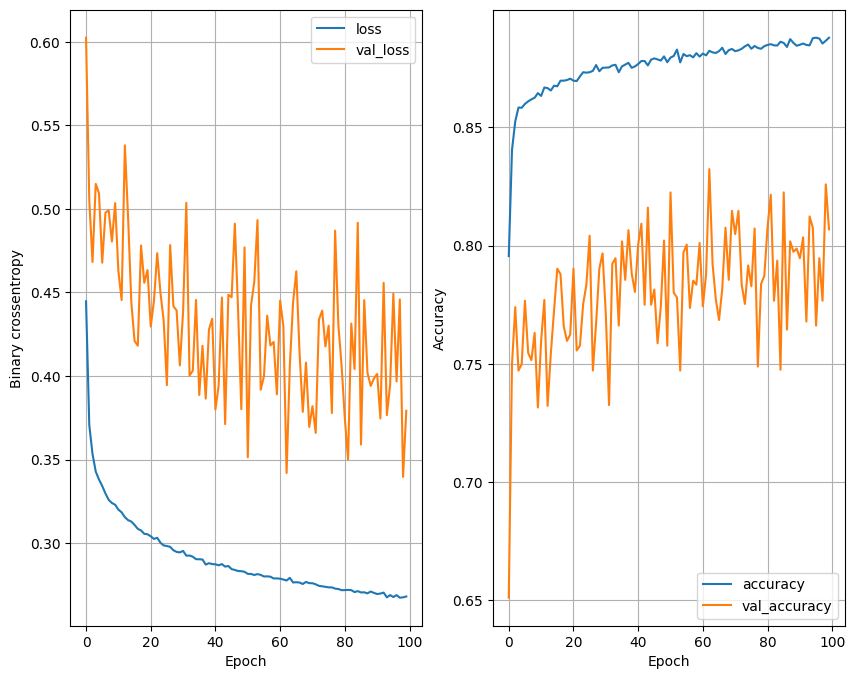

357/357 [==============================] - 0s 1ms/step - loss: 0.2595 - accuracy: 0.8919
32 nodes, dropout 0, lr 0.001 , batch size 64


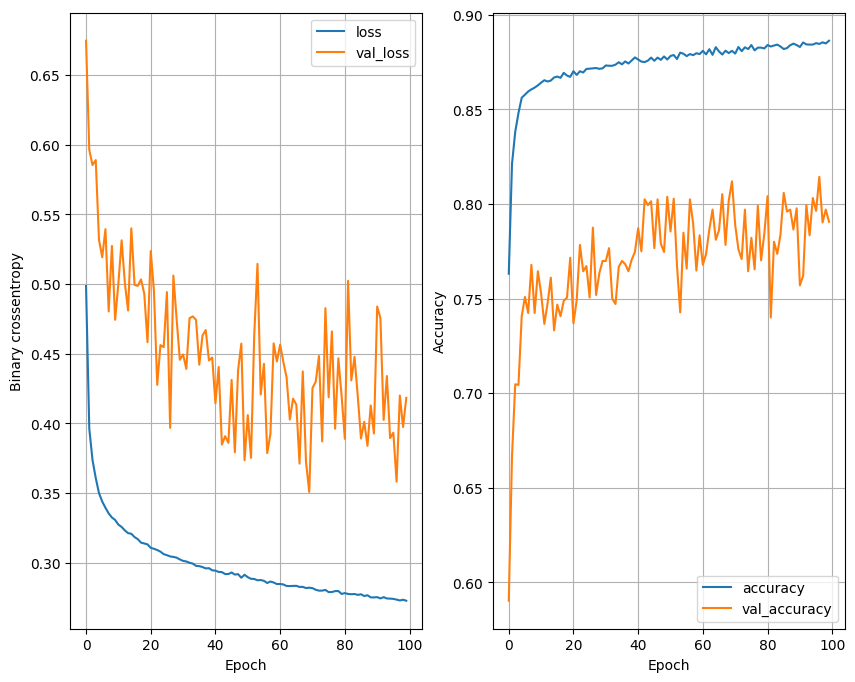

357/357 [==============================] - 0s 1ms/step - loss: 0.2638 - accuracy: 0.8919
32 nodes, dropout 0, lr 0.001 , batch size 128


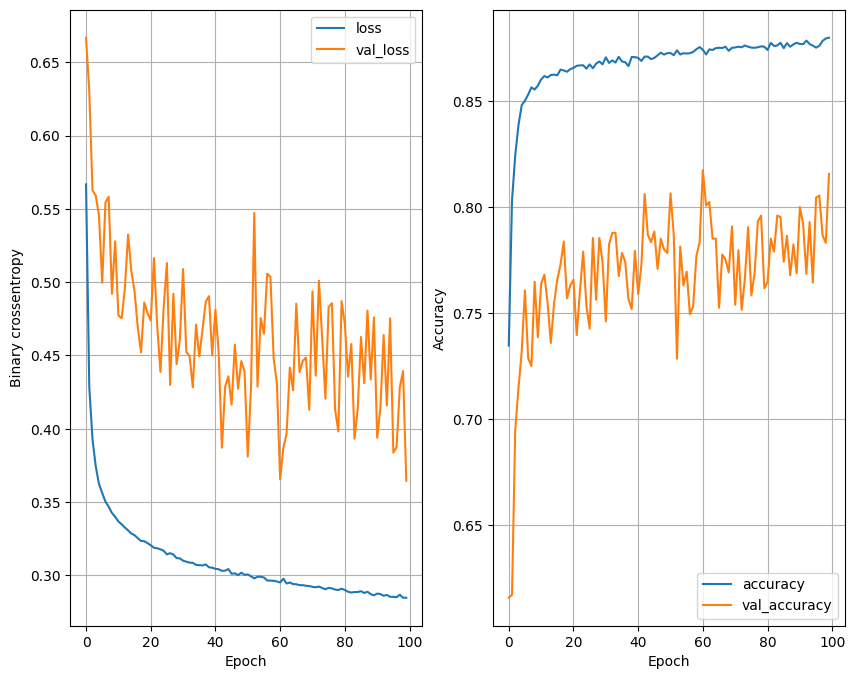

357/357 [==============================] - 0s 1ms/step - loss: 0.2839 - accuracy: 0.8801
32 nodes, dropout 0.2, lr 0.1 , batch size 32


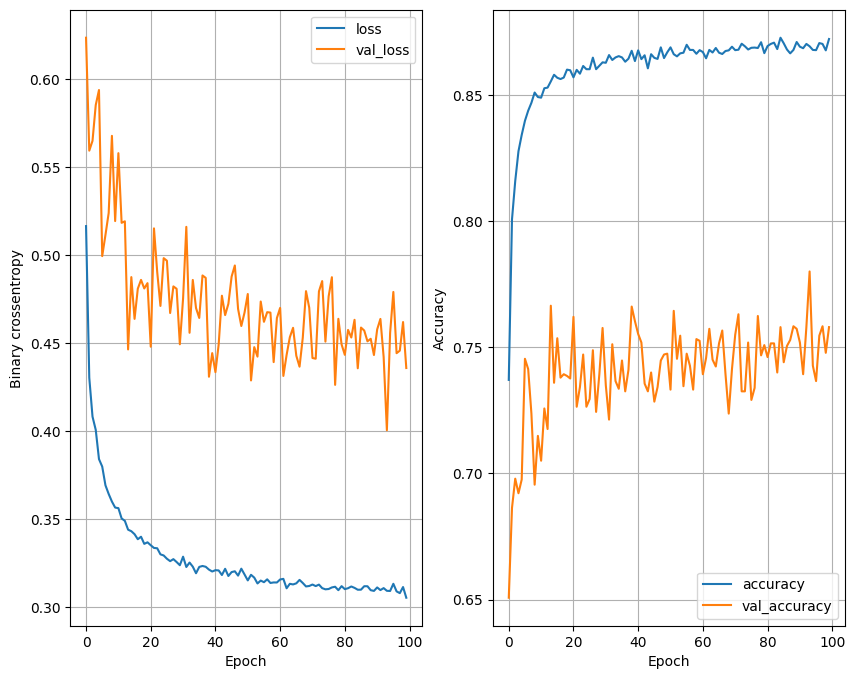

357/357 [==============================] - 1s 2ms/step - loss: 0.2805 - accuracy: 0.8853
32 nodes, dropout 0.2, lr 0.1 , batch size 64


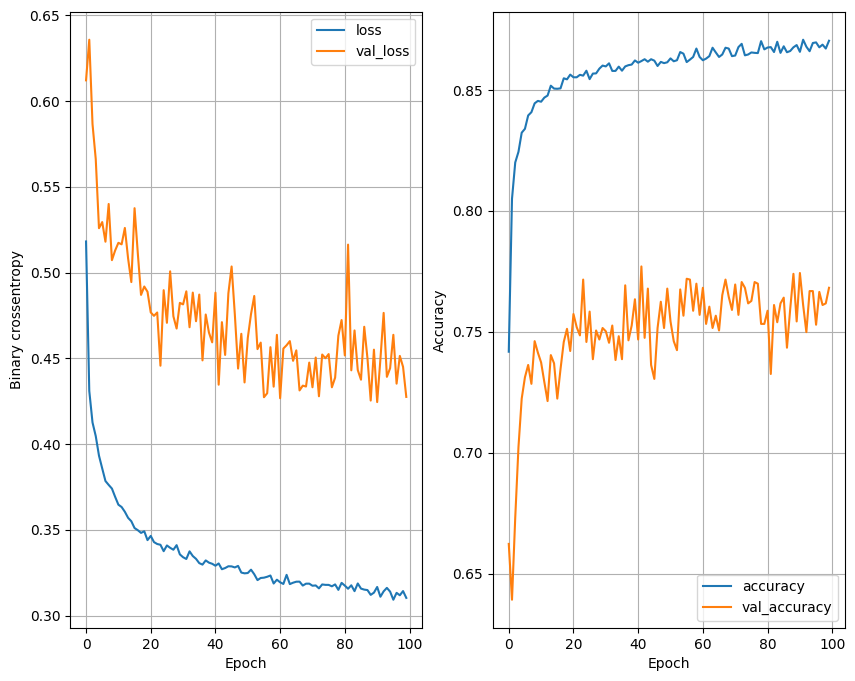

357/357 [==============================] - 0s 1ms/step - loss: 0.2826 - accuracy: 0.8836
32 nodes, dropout 0.2, lr 0.1 , batch size 128


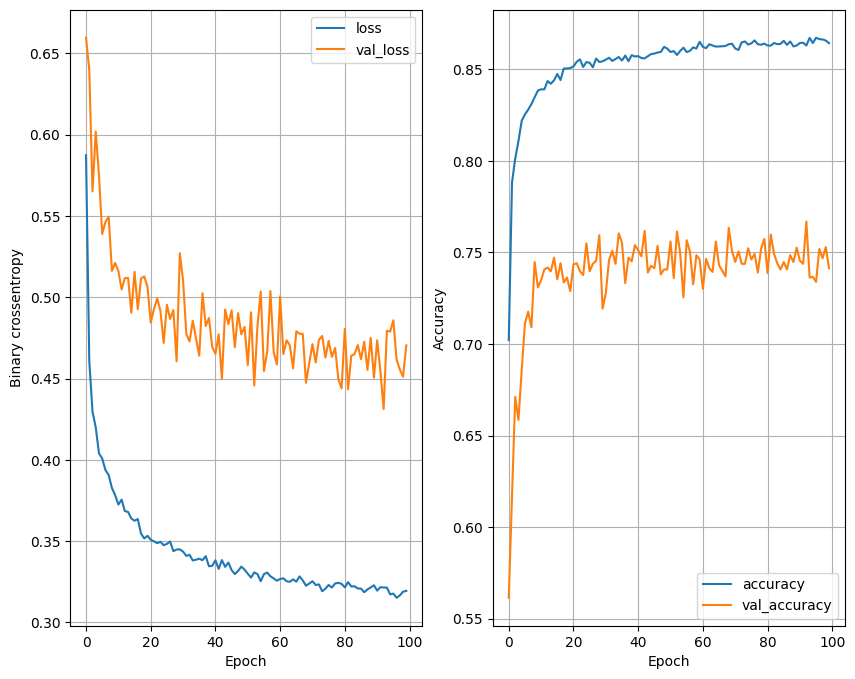

357/357 [==============================] - 0s 1ms/step - loss: 0.2908 - accuracy: 0.8776
32 nodes, dropout 0.2, lr 0.005 , batch size 32


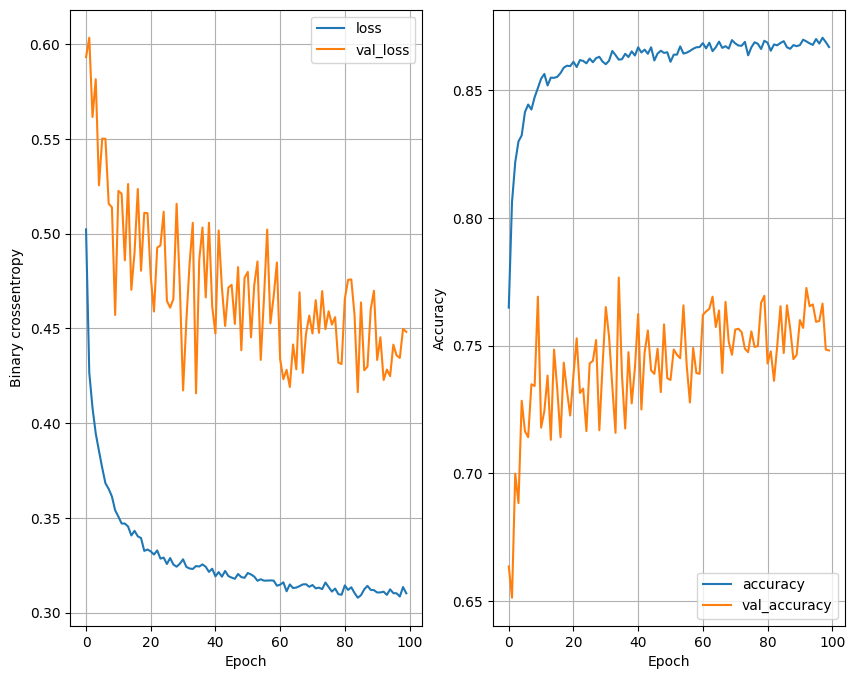

357/357 [==============================] - 0s 1ms/step - loss: 0.2831 - accuracy: 0.8807
32 nodes, dropout 0.2, lr 0.005 , batch size 64


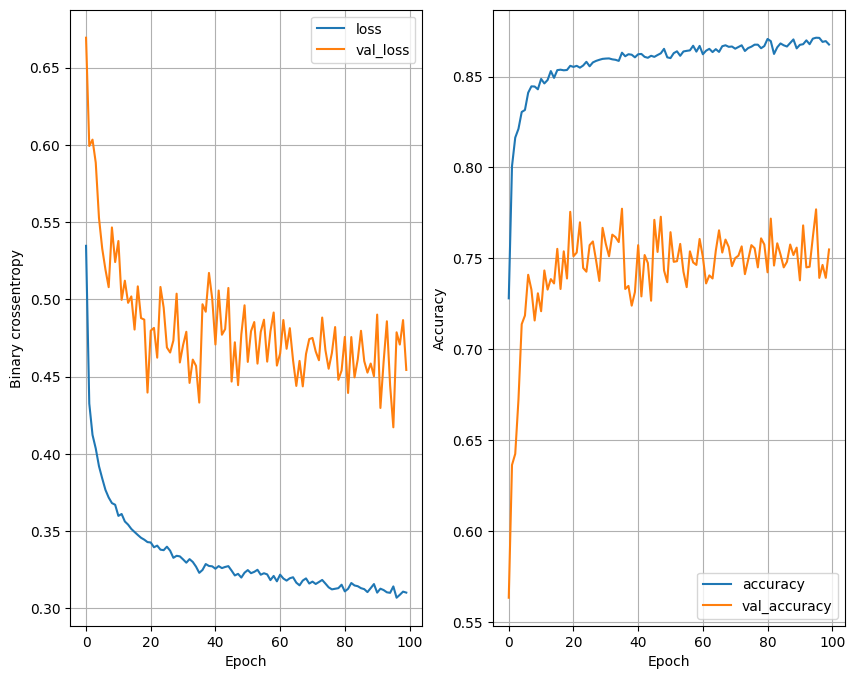

357/357 [==============================] - 0s 1ms/step - loss: 0.2832 - accuracy: 0.8822
32 nodes, dropout 0.2, lr 0.005 , batch size 128


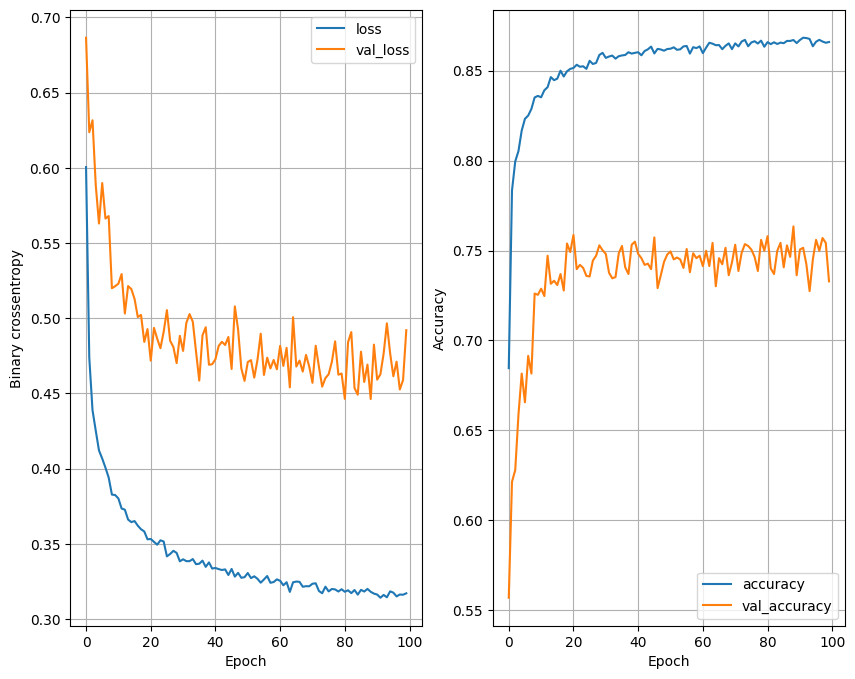

357/357 [==============================] - 0s 1ms/step - loss: 0.2895 - accuracy: 0.8790
32 nodes, dropout 0.2, lr 0.001 , batch size 32


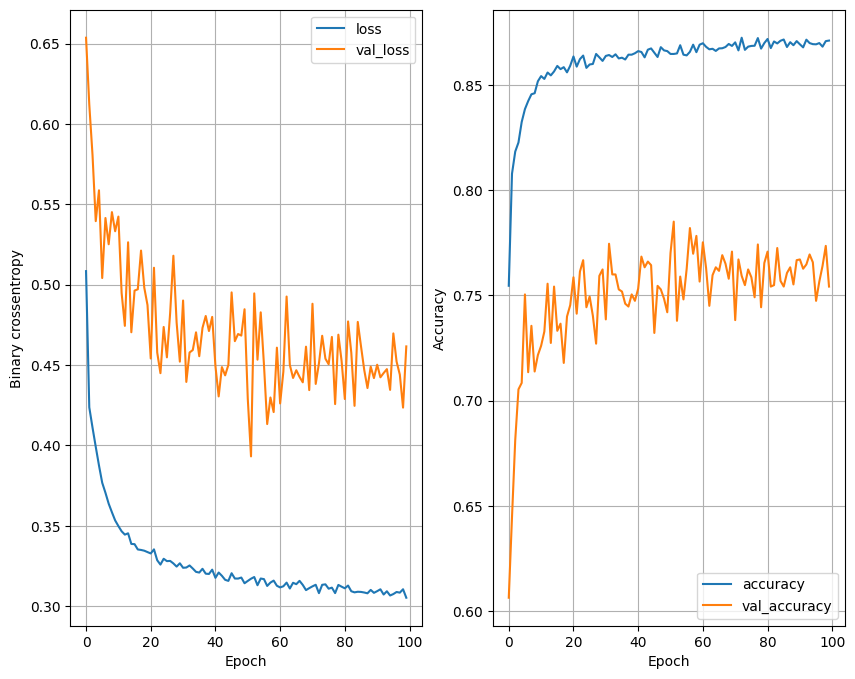

357/357 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.8833
32 nodes, dropout 0.2, lr 0.001 , batch size 64


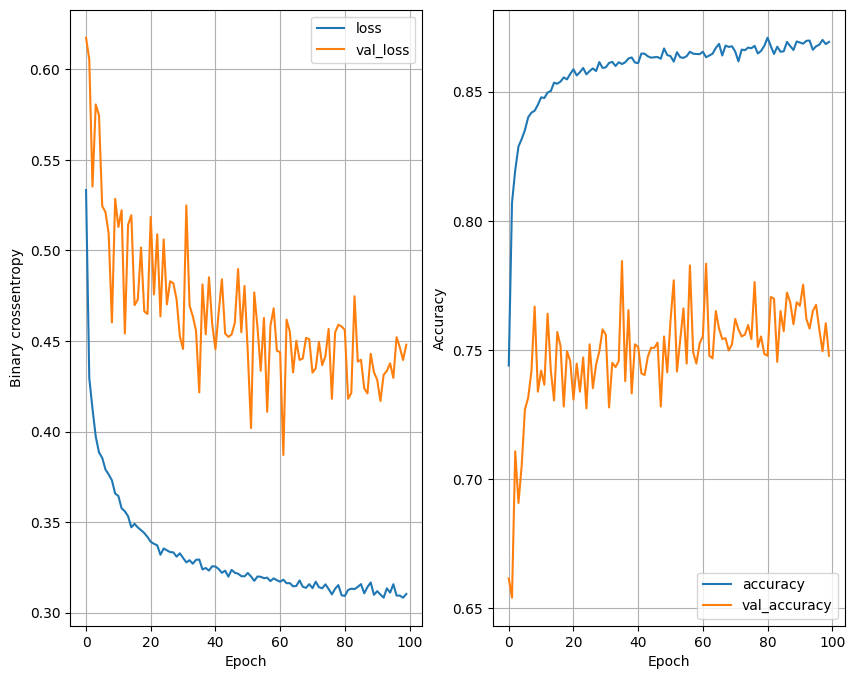

357/357 [==============================] - 1s 1ms/step - loss: 0.2849 - accuracy: 0.8797
32 nodes, dropout 0.2, lr 0.001 , batch size 128


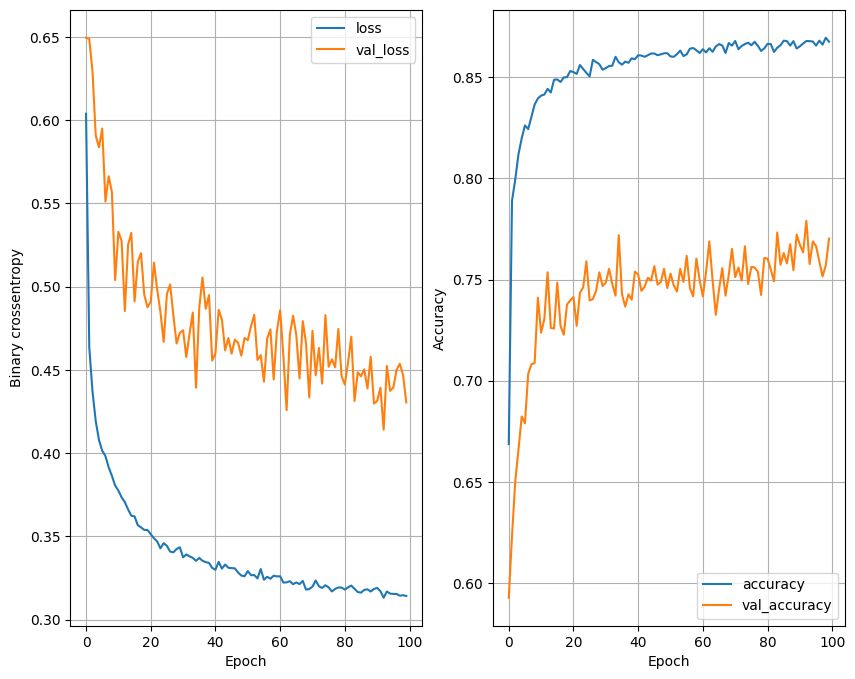

357/357 [==============================] - 0s 1ms/step - loss: 0.2882 - accuracy: 0.8806
64 nodes, dropout 0, lr 0.1 , batch size 32


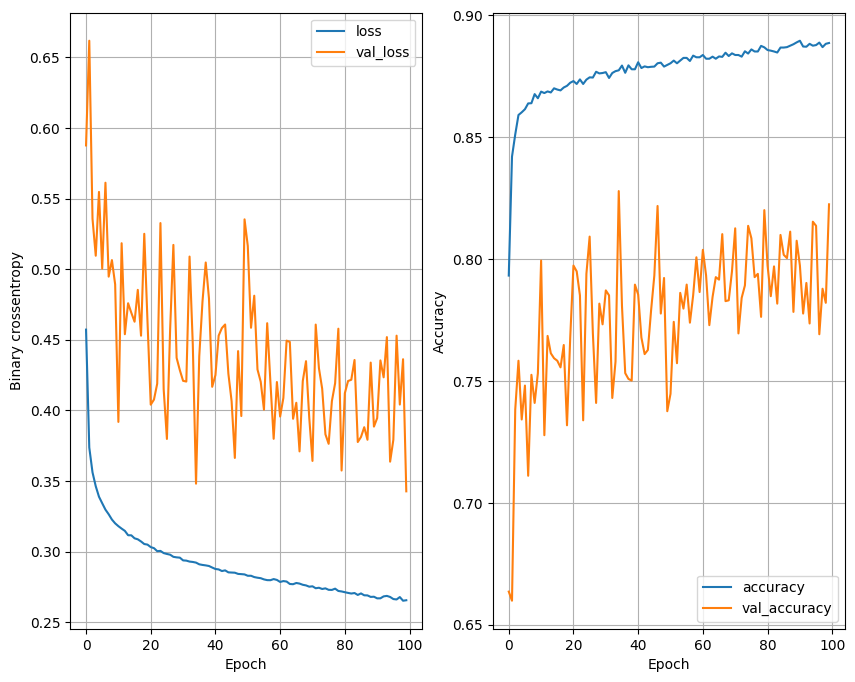

357/357 [==============================] - 1s 1ms/step - loss: 0.2601 - accuracy: 0.8927
64 nodes, dropout 0, lr 0.1 , batch size 64


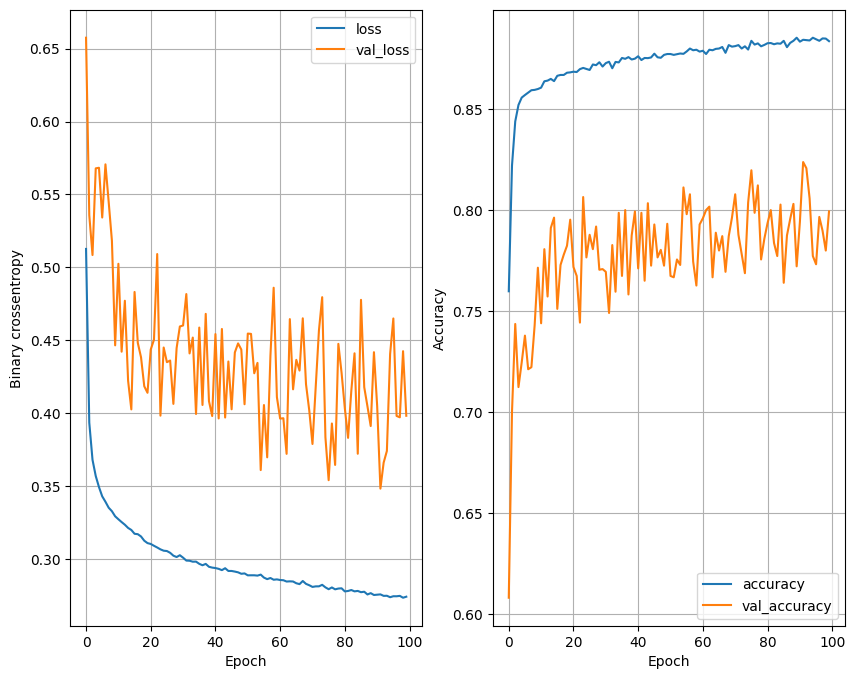

357/357 [==============================] - 1s 1ms/step - loss: 0.2650 - accuracy: 0.8897
64 nodes, dropout 0, lr 0.1 , batch size 128


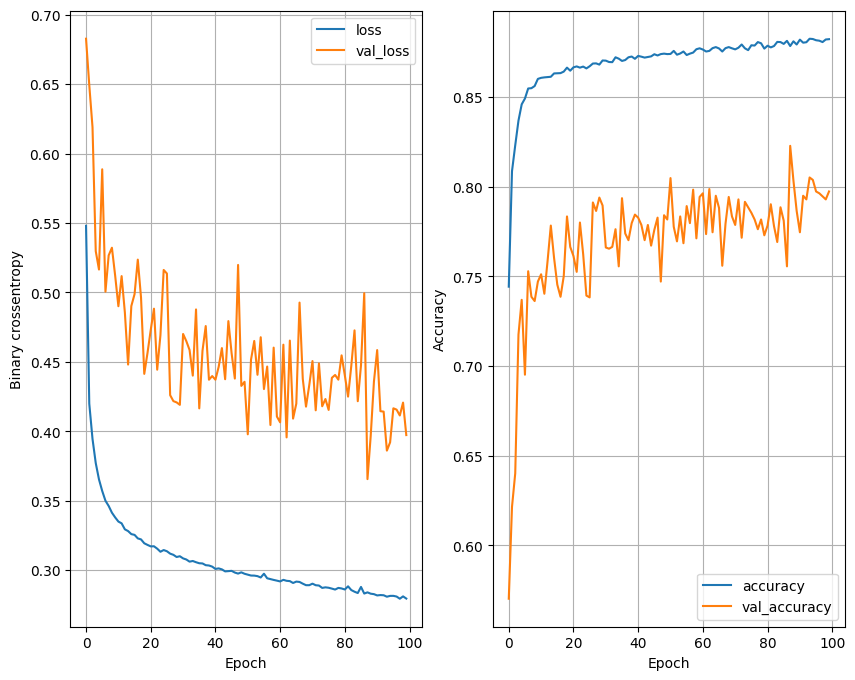

357/357 [==============================] - 1s 1ms/step - loss: 0.2737 - accuracy: 0.8875
64 nodes, dropout 0, lr 0.005 , batch size 32


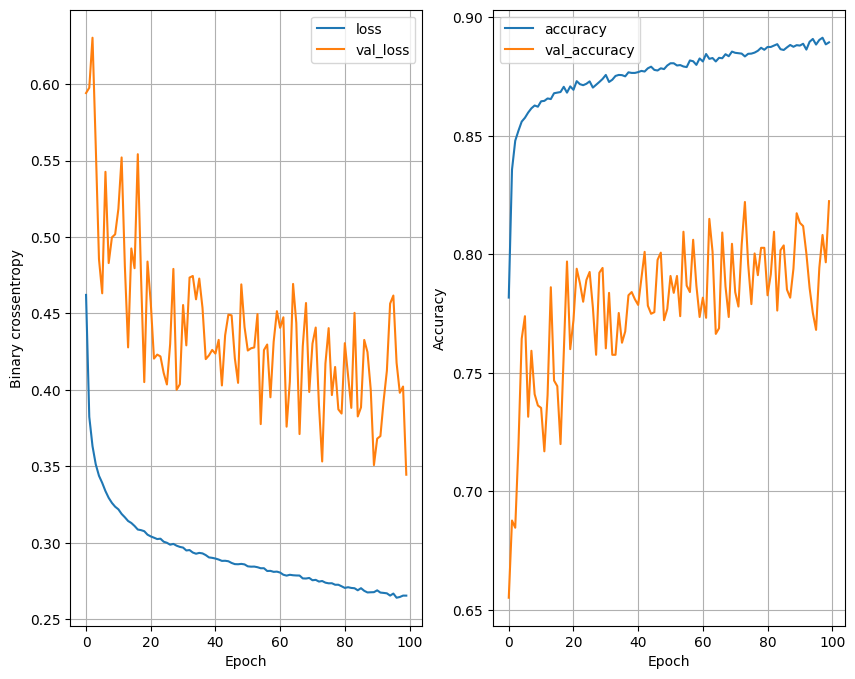

357/357 [==============================] - 1s 2ms/step - loss: 0.2586 - accuracy: 0.8944
64 nodes, dropout 0, lr 0.005 , batch size 64


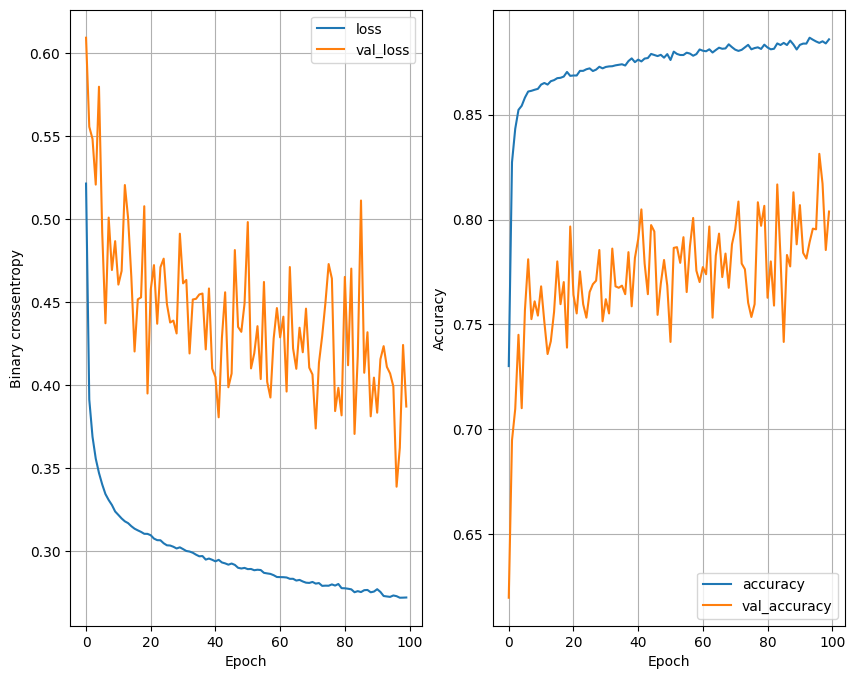

357/357 [==============================] - 1s 1ms/step - loss: 0.2639 - accuracy: 0.8905
64 nodes, dropout 0, lr 0.005 , batch size 128


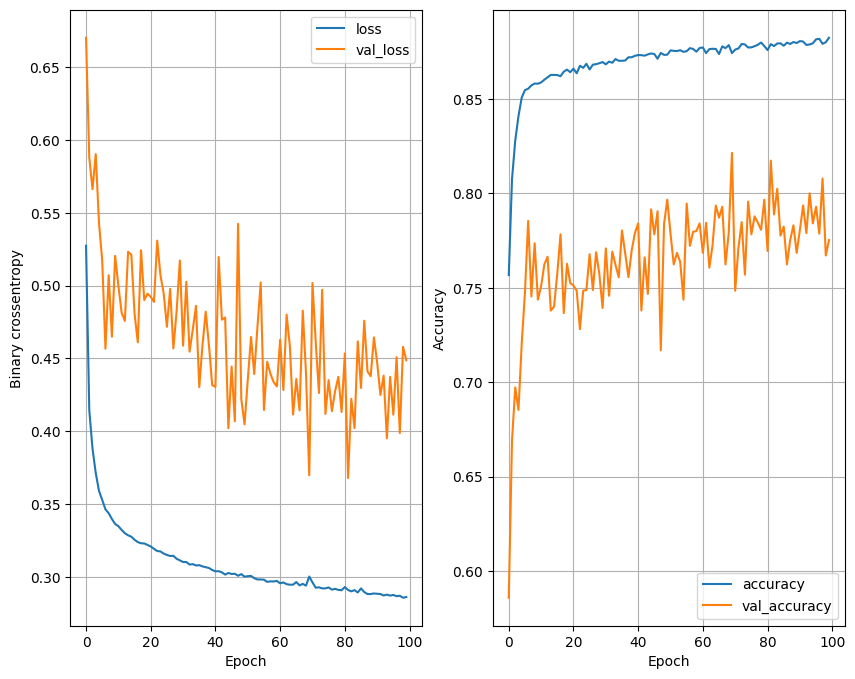

357/357 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.8864
64 nodes, dropout 0, lr 0.001 , batch size 32


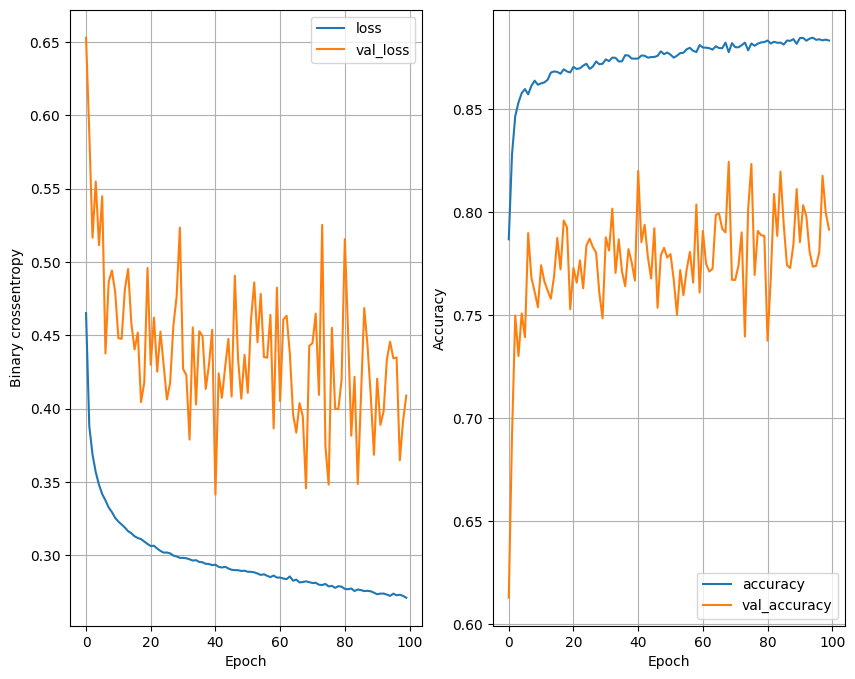

357/357 [==============================] - 0s 1ms/step - loss: 0.2650 - accuracy: 0.8888
64 nodes, dropout 0, lr 0.001 , batch size 64


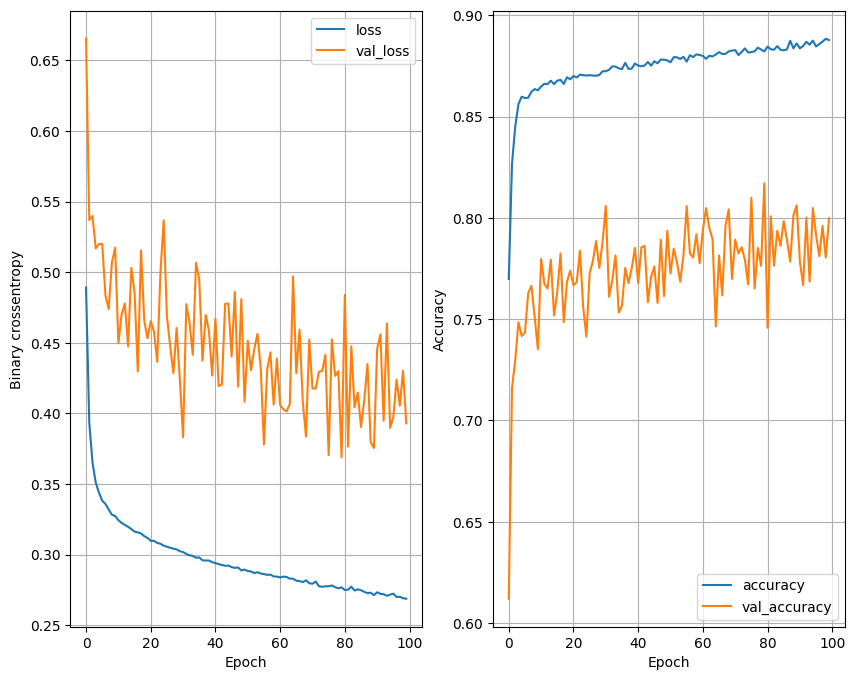

357/357 [==============================] - 0s 1ms/step - loss: 0.2618 - accuracy: 0.8938
64 nodes, dropout 0, lr 0.001 , batch size 128


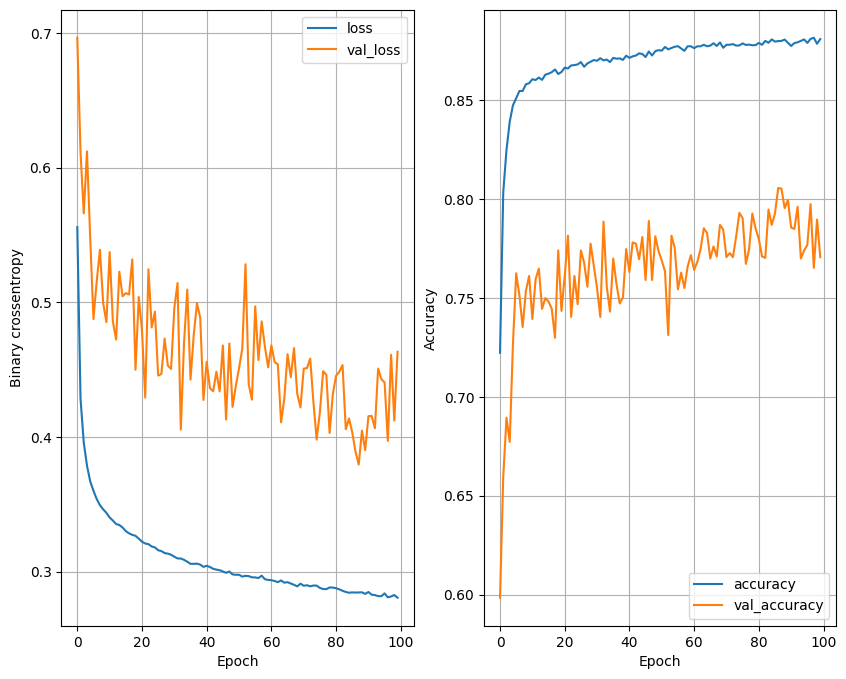

357/357 [==============================] - 0s 1ms/step - loss: 0.2736 - accuracy: 0.8843
64 nodes, dropout 0.2, lr 0.1 , batch size 32


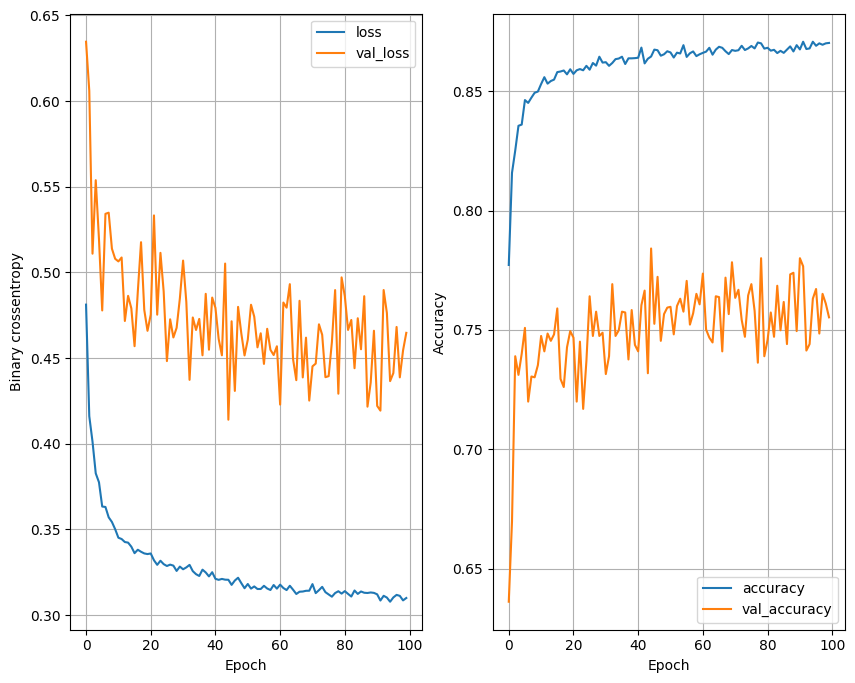

357/357 [==============================] - 0s 1ms/step - loss: 0.2812 - accuracy: 0.8828
64 nodes, dropout 0.2, lr 0.1 , batch size 64


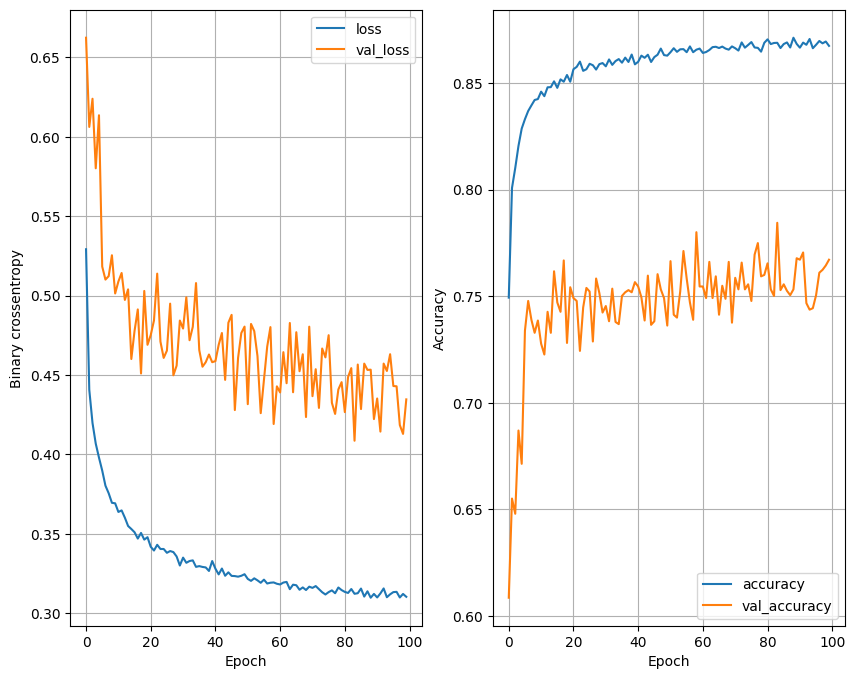

357/357 [==============================] - 0s 1ms/step - loss: 0.2824 - accuracy: 0.8817
64 nodes, dropout 0.2, lr 0.1 , batch size 128


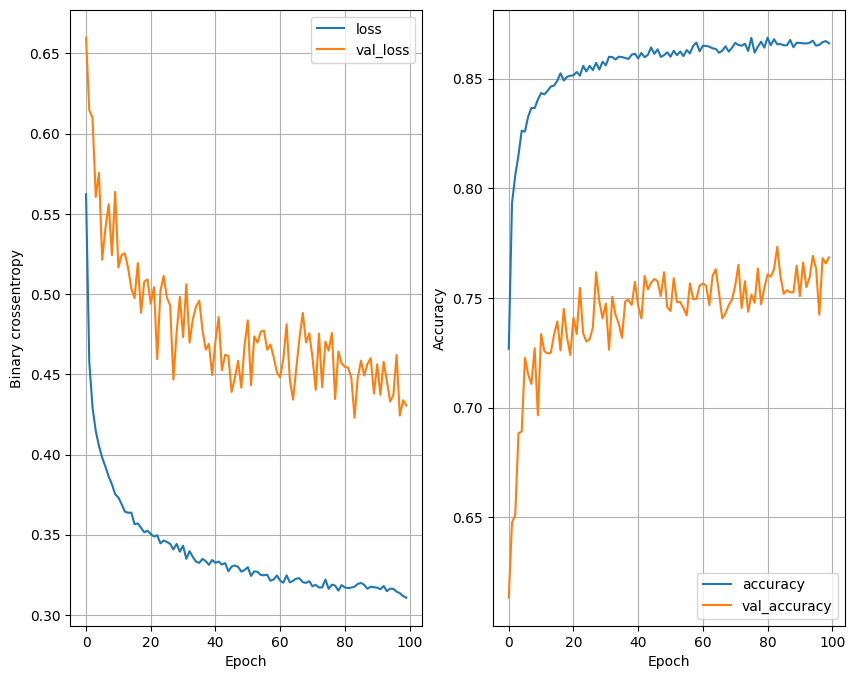

357/357 [==============================] - 1s 1ms/step - loss: 0.2887 - accuracy: 0.8793
64 nodes, dropout 0.2, lr 0.005 , batch size 32


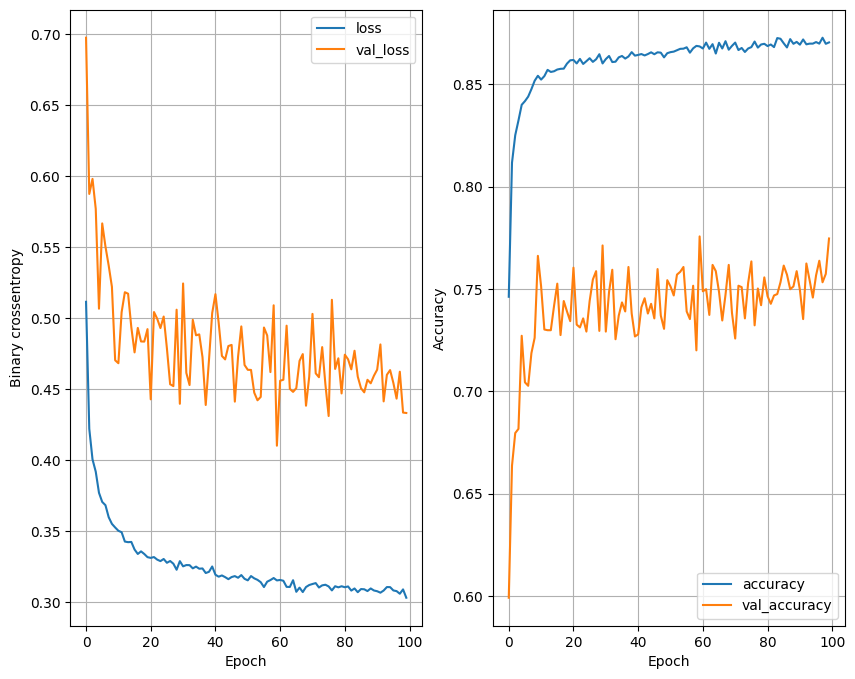

357/357 [==============================] - 0s 1ms/step - loss: 0.2800 - accuracy: 0.8848
64 nodes, dropout 0.2, lr 0.005 , batch size 64


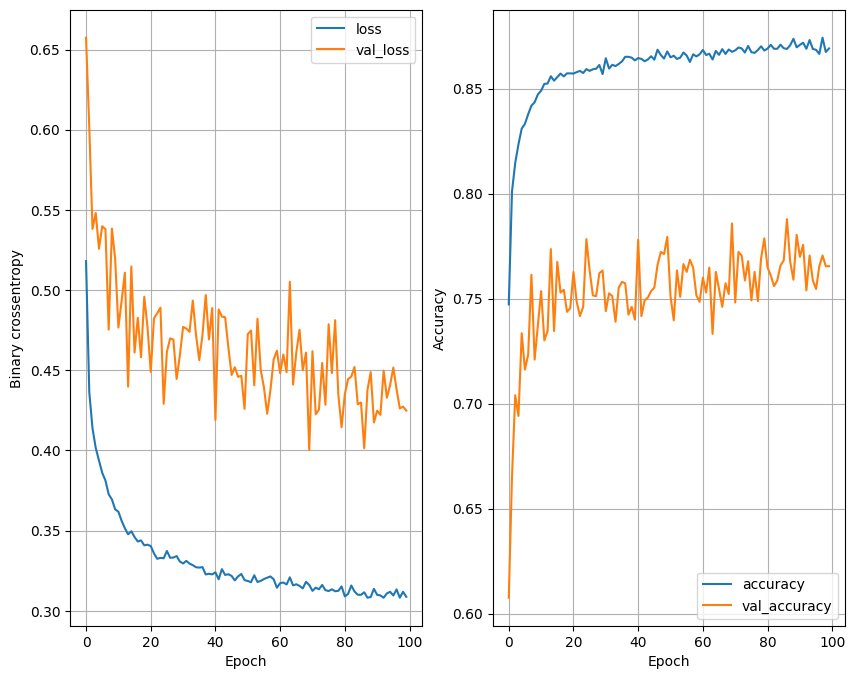

357/357 [==============================] - 1s 2ms/step - loss: 0.2817 - accuracy: 0.8836
64 nodes, dropout 0.2, lr 0.005 , batch size 128


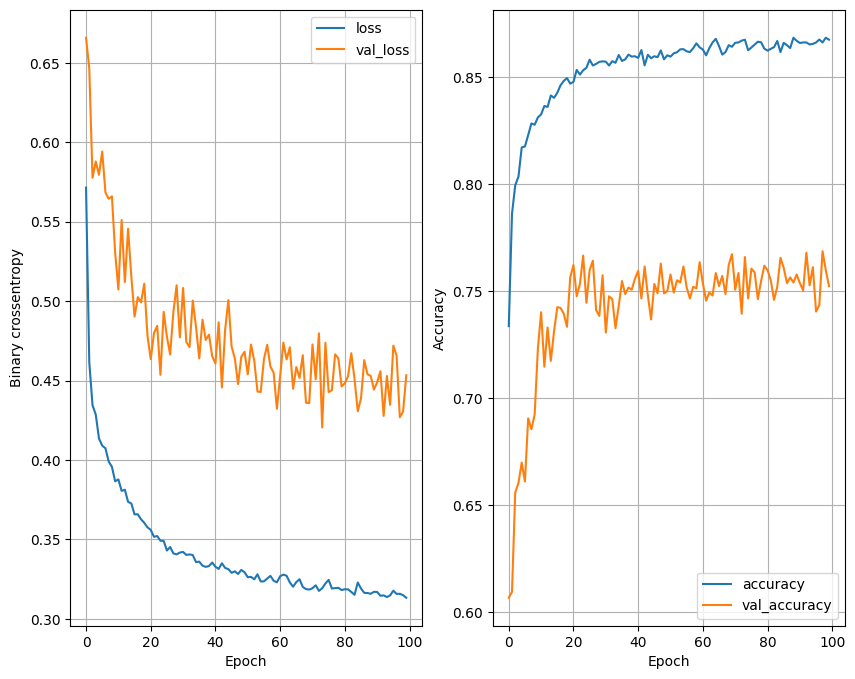

357/357 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.8792
64 nodes, dropout 0.2, lr 0.001 , batch size 32


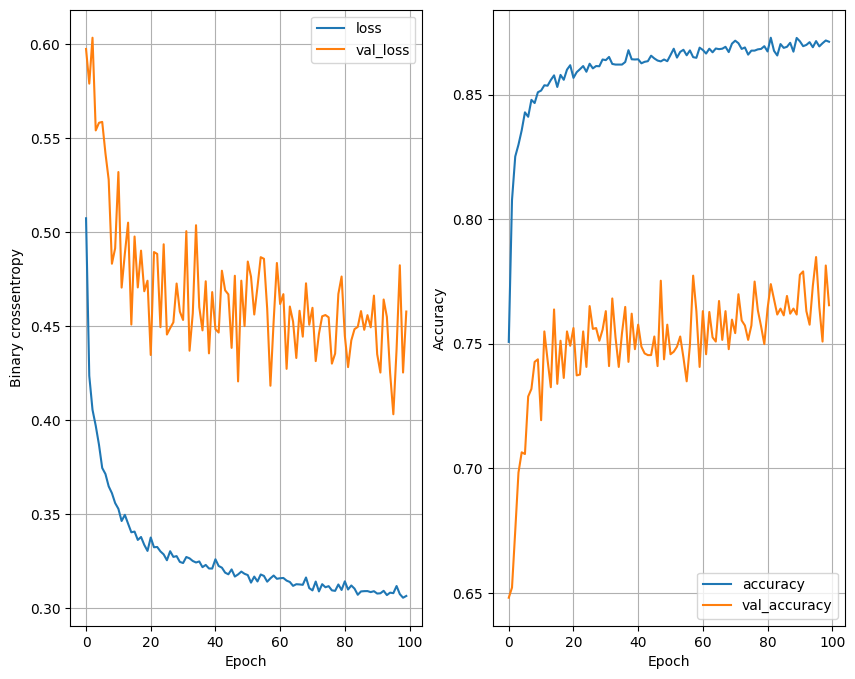

357/357 [==============================] - 0s 1ms/step - loss: 0.2771 - accuracy: 0.8840
64 nodes, dropout 0.2, lr 0.001 , batch size 64


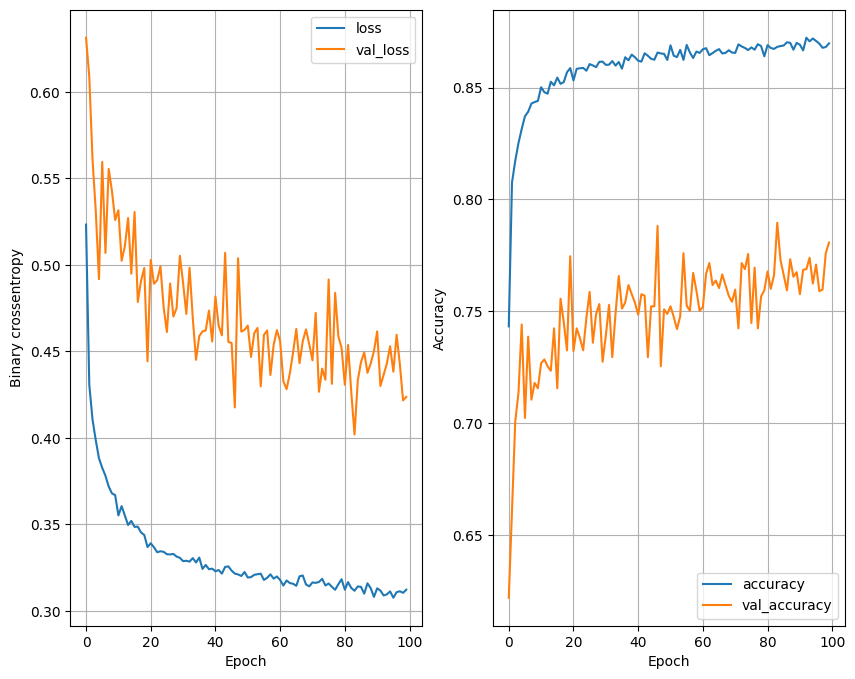

357/357 [==============================] - 0s 1ms/step - loss: 0.2820 - accuracy: 0.8840
64 nodes, dropout 0.2, lr 0.001 , batch size 128


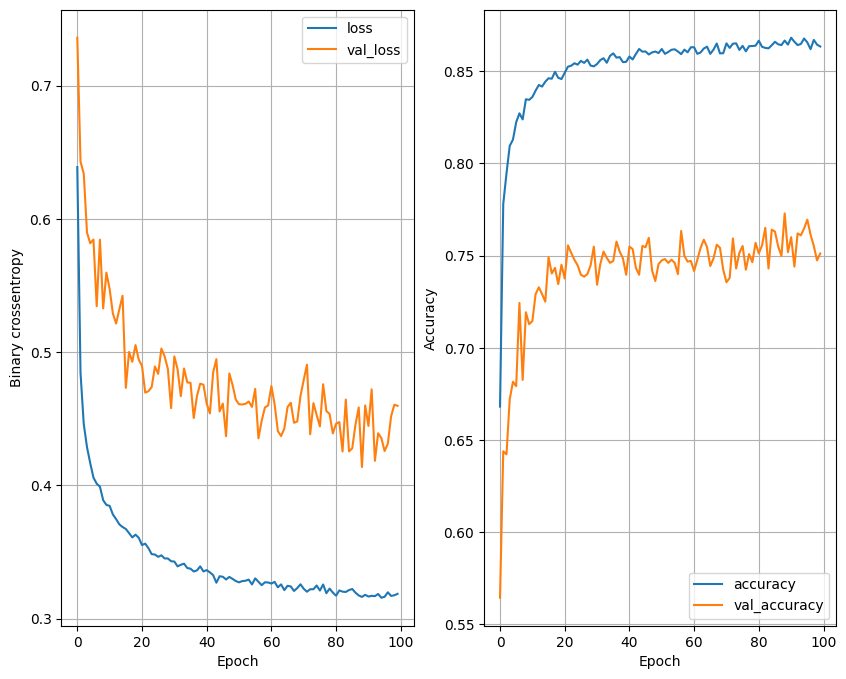

357/357 [==============================] - 1s 1ms/step - loss: 0.2919 - accuracy: 0.8786


In [ ]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [16, 32, 64]:
  for dropout_prob in [0, 0.2]:
    for lr in [0.1 ,0.005, 0.001]:
      for batch_size in [32, 64,128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr} , batch size {batch_size}")
        model, history = train_model(x_train, y_train, num_nodes, dropout_prob , lr, batch_size,epochs)
        plot_history(history)

        val_loss, _ = model.evaluate(x_valid, y_valid)  # Accessing only the first element (loss)
        if val_loss < least_val_loss:
         least_val_loss = val_loss
         least_loss_model = model

